In [2]:
import pandas as pd
import numpy as np
import subprocess
import json
import seaborn as sns
import os

In [3]:
links_to_process = pd.read_json('google_organic_citations_short_name_ges_disc.json', 
                                orient='records')["link"].tolist()

In [119]:
links_to_process[0]

'https://iopscience.iop.org/article/10.1088/1742-6596/869/1/012070/meta'

Make sure bash script has executable permissions

In [120]:
zjson_df, bib_df = pd.DataFrame(), pd.DataFrame()

counter = 0
repeat_run = True
prev_url = ""
failed, perffail = [], []
for url in links_to_process:
    # if not running for first time
    #if repeat_run:
        
    # call bash script
    rc = subprocess.call("./zot.sh '%s'" % (url), shell=True)
    # create df for this url
    
    perf = False
    try:
        while True:
            temp1_df = pd.read_json('temp1.json', orient='records')
            # manual error handling
            if ("url" in temp1_df) and temp1_df["url"].str.contains("validate.perfdrive")[0]:
                perf = True
                break
            url_exists = "url" in temp1_df
            with open("temp2.json") as f:
                temp1_df["bib"] = f.read()
            if not url_exists:
                break
            if (temp1_df["url"] != prev_url)[0]:
                break
        if not perf:
            if url_exists:
                prev_url = temp1_df["url"]

            temp1_df['tURL'] = url
            temp1_df["index"] = counter
            temp1_df['fail'] = False
            temp1_df['perf'] = False

            if "date" in temp1_df:
                temp1_df["year"] = temp1_df['date'].astype(str).apply(lambda x: '(' + x[0:4] + ')' if x[0] != 'n' else x)
            
            if "creators" in temp1_df:
                splitlist = str(temp1_df["creators"][0]).split('\'')
                temp1_df["author"] = splitlist[3][0] + ' ' + splitlist[7]
            
            if ('extra' in temp1_df):
                extra_str = temp1_df["extra"][0]
                if (type(extra_str) == str) and extra_str[0:3] == 'DOI':
                    print("doi from extra: " + str('DOI' in temp1_df) + " " + extra_str[5:])
                    temp1_df["DOI"] = extra_str[5:]

            zjson_df = pd.concat([zjson_df, temp1_df], sort=False)
            print(counter)
        else:
            perffail.append(counter)
            temp_df = pd.DataFrame({'fail': [True], 'tURL': [url], 'perf': [True], 'index': [counter]})
            zjson_df = pd.concat([zjson_df, temp_df], sort=False)
            print('Perfdrive: ' + str(counter))
        
    except:
        failed.append(counter)
        temp_df = pd.DataFrame({'fail': [True], 'tURL': [url], 'perf': [False], 'index': [counter]})
        zjson_df = pd.concat([zjson_df, temp_df], sort=False)
        print('Failed: ' + str(counter))
    
    counter += 1
    
    
    
    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   848  100   778  100    70    579     52  0:00:01  0:00:01 --:--:--   634
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1539  100   761  100   778  22498  23001 --:--:-- --:--:-- --:--:-- 69954


Perfdrive: 0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2877  100  2850  100    27   1610     15  0:00:01  0:00:01 --:--:--  1631
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5376  100  2526  100  2850   128k   145k --:--:-- --:--:-- --:--:--  656k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

1


100  1071  100  1034  100    37    554     19  0:00:01  0:00:01 --:--:--   575
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1666  100   632  100  1034  26534  43412 --:--:-- --:--:-- --:--:--  147k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

2


100  3431  100  3364  100    67   3613     71 --:--:-- --:--:-- --:--:--  3705
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6303  100  2939  100  3364   191k   219k --:--:-- --:--:-- --:--:-- 1538k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

3


100  2088  100  1988  100   100    720     36  0:00:02  0:00:02 --:--:--   758
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3837  100  1849  100  1988   110k   118k --:--:-- --:--:-- --:--:--  749k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

4


100  2912  100  2863  100    49   2478     42  0:00:01  0:00:01 --:--:--  2536
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5621  100  2758  100  2863   194k   201k --:--:-- --:--:-- --:--:-- 1097k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

5


100  1532  100  1330  100   202   1453    220 --:--:-- --:--:-- --:--:--  1681
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2538  100  1208  100  1330  44219  48685 --:--:-- --:--:-- --:--:--  165k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

6


100  4382  100  4319  100    63   1229     17  0:00:03  0:00:03 --:--:--  1249
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4324  100    11  100  4313    752   288k --:--:-- --:--:-- --:--:-- 1407k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 7


100  2810  100  2762  100    48   2106     36  0:00:01  0:00:01 --:--:--  2151
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5388  100  2626  100  2762   177k   186k --:--:-- --:--:-- --:--:-- 1052k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

8


100  2848  100  2780  100    68   2854     69 --:--:-- --:--:-- --:--:--  2936
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4072  100  1292  100  2780  79532   167k --:--:-- --:--:-- --:--:--  795k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

9


100  2823  100  2749  100    74   1021     27  0:00:02  0:00:02 --:--:--  1051
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5071  100  2322  100  2749   113k   133k --:--:-- --:--:-- --:--:--  990k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

10


100  2602  100  2541  100    61   1317     31  0:00:01  0:00:01 --:--:--  1351
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4854  100  2315  100  2539   174k   191k --:--:-- --:--:-- --:--:-- 1185k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

11


100  2538  100  2473  100    65   1950     51  0:00:01  0:00:01 --:--:--  2012
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4597  100  2124  100  2473   129k   151k --:--:-- --:--:-- --:--:--  748k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

12


100  3132  100  3031  100   101    955     31  0:00:03  0:00:03 --:--:--   989
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5648  100  2617  100  3031   148k   172k --:--:-- --:--:-- --:--:-- 1103k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

13


100  7490  100  7438  100    52   4362     30  0:00:01  0:00:01 --:--:--  4403
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14681  100  7243  100  7438   544k   559k --:--:-- --:--:-- --:--:-- 3584k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

14


100  1869  100  1815  100    54   1291     38  0:00:01  0:00:01 --:--:--  1334
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3207  100  1392  100  1815  62646  81683 --:--:-- --:--:-- --:--:--  313k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

15


100  2829  100  2775  100    54   1527     29  0:00:01  0:00:01 --:--:--  1562
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5131  100  2356  100  2775  91409   105k --:--:-- --:--:-- --:--:--  385k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

16


100   822  100   754  100    68    764     68  0:00:01 --:--:--  0:00:01   836
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1330  100   576  100   754  40880  53513 --:--:-- --:--:-- --:--:--  259k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

17


100  1575  100  1548  100    27   1141     19  0:00:01  0:00:01 --:--:--  1166
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2931  100  1383  100  1548  78374  87725 --:--:-- --:--:-- --:--:--  357k


18


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3069  100  2969  100   100    648     21  0:00:04  0:00:04 --:--:--   880
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5351  100  2382  100  2969   130k   162k --:--:-- --:--:-- --:--:--  746k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

19


100  2516  100  2489  100    27   1845     20  0:00:01  0:00:01 --:--:--  1872
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4799  100  2310  100  2489   141k   152k --:--:-- --:--:-- --:--:-- 1171k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

20


100  1780  100  1712  100    68   1985     78 --:--:-- --:--:-- --:--:--  2074
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2636  100   924  100  1712  55878   101k --:--:-- --:--:-- --:--:--  514k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

21


100  3254  100  3187  100    67   2521     53  0:00:01  0:00:01 --:--:--  2586
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5709  100  2522  100  3187   171k   216k --:--:-- --:--:-- --:--:-- 1115k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

22


100   911  100   843  100    68   1302    105 --:--:-- --:--:-- --:--:--  1416
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1355  100   512  100   843  30378  50017 --:--:-- --:--:-- --:--:--  220k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

23


100  2139  100  2085  100    54    783     20  0:00:02  0:00:02 --:--:--   805
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3812  100  1727  100  2085  76243  92048 --:--:-- --:--:-- --:--:--  372k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

24


100  3468  100  3326  100   142   2314     98  0:00:01  0:00:01 --:--:--  2420
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6162  100  2836  100  3326   143k   167k --:--:-- --:--:-- --:--:--  752k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

25


100  3162  100  3135  100    27   2554     22  0:00:01  0:00:01 --:--:--  2585
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5870  100  2735  100  3135   178k   204k --:--:-- --:--:-- --:--:-- 1146k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

26


100  2673  100  2619  100    54   1483     30  0:00:01  0:00:01 --:--:--  1517
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4748  100  2129  100  2619  69206  85134 --:--:-- --:--:-- --:--:--  257k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

27


100  2243  100  2176  100    67   1983     61  0:00:01  0:00:01 --:--:--  2055
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3956  100  1780  100  2176  87949   104k --:--:-- --:--:-- --:--:--  643k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

28


100  2089  100  2038  100    51   1880     47  0:00:01  0:00:01 --:--:--  1936
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3935  100  1897  100  2038   162k   174k --:--:-- --:--:-- --:--:-- 1921k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

29


100  2830  100  2652  100   178   1506    101  0:00:01  0:00:01 --:--:--  1612
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4942  100  2290  100  2652   130k   151k --:--:-- --:--:-- --:--:--  965k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

30


100  3010  100  2956  100    54   1858     33  0:00:01  0:00:01 --:--:--  1897
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5367  100  2411  100  2956  87064   104k --:--:-- --:--:-- --:--:--  374k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

31


100  1200  100  1132  100    68   1249     75 --:--:-- --:--:-- --:--:--  1330
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1792  100   660  100  1132  48856  83795 --:--:-- --:--:-- --:--:--  350k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

32


100  2847  100  2793  100    54   1697     32  0:00:01  0:00:01 --:--:--  1737
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5040  100  2247  100  2793    97k   121k --:--:-- --:--:-- --:--:--  492k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

33


100  2695  100  2636  100    59   1368     30  0:00:01  0:00:01 --:--:--  1402
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5007  100  2371  100  2636   124k   138k --:--:-- --:--:-- --:--:--  543k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

34


100  3483  100  3416  100    67   2528     49  0:00:01  0:00:01 --:--:--  2587
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6393  100  2977  100  3416   140k   161k --:--:-- --:--:-- --:--:--  780k


35


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   931  100   863  100    68   1031     81 --:--:-- --:--:-- --:--:--  1120
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1483  100   620  100   863  40464  56324 --:--:-- --:--:-- --:--:--  362k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

36


100   990  100   934  100    56    830     49  0:00:01  0:00:01 --:--:--   884
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1494  100   560  100   934  44381  74021 --:--:-- --:--:-- --:--:--  486k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

37


100  1857  100  1655  100   202   1662    202  0:00:01 --:--:--  0:00:01  1871
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3186  100  1531  100  1655  47933  51815 --:--:-- --:--:-- --:--:--  172k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

38


100  2871  100  2804  100    67   2565     61  0:00:01  0:00:01 --:--:--  2641
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5294  100  2490  100  2804  97501   107k --:--:-- --:--:-- --:--:--  430k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

39


100  2370  100  2320  100    50   2209     47  0:00:01  0:00:01 --:--:--  2267
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4589  100  2269  100  2320   176k   180k --:--:-- --:--:-- --:--:-- 1493k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

40


100  2950  100  2888  100    62   1596     34  0:00:01  0:00:01 --:--:--  1635
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5235  100  2347  100  2888   123k   152k --:--:-- --:--:-- --:--:--  639k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

41


100  2509  100  2465  100    44   1499     26  0:00:01  0:00:01 --:--:--  1531
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4706  100  2241  100  2465   155k   171k --:--:-- --:--:-- --:--:-- 1148k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

42


100  2845  100  2778  100    67   2980     71 --:--:-- --:--:-- --:--:--  3072
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5092  100  2314  100  2778   102k   123k --:--:-- --:--:-- --:--:--  621k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

43


100  2206  100  2150  100    56   2159     56  0:00:01 --:--:--  0:00:01  2228
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3962  100  1812  100  2150   111k   132k --:--:-- --:--:-- --:--:--  644k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

44


100  2514  100  2447  100    67   2732     74 --:--:-- --:--:-- --:--:--  2818
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4628  100  2181  100  2447  99753   109k --:--:-- --:--:-- --:--:--  564k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

45


100  1110  100  1042  100    68   1227     80 --:--:-- --:--:-- --:--:--  1316
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1820  100   778  100  1042  60016  80382 --:--:-- --:--:-- --:--:--  444k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

46


100  3139  100  3085  100    54   1686     29  0:00:01  0:00:01 --:--:--  1720
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5620  100  2535  100  3085   107k   130k --:--:-- --:--:-- --:--:--  609k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

47


100   902  100   834  100    68   1044     85 --:--:-- --:--:-- --:--:--  1136
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1478  100   644  100   834  35162  45536 --:--:-- --:--:-- --:--:--  206k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

48


100  3134  100  3080  100    54   1506     26  0:00:02  0:00:02 --:--:--  1539
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5644  100  2564  100  3080   102k   123k --:--:-- --:--:-- --:--:--  551k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

49


100  1184  100  1118  100    66   1317     77 --:--:-- --:--:-- --:--:--  1401
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1869  100   751  100  1118  45570  67839 --:--:-- --:--:-- --:--:--  365k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

50


100   640  100   538  100   102    531    100  0:00:01  0:00:01 --:--:--   636
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1062  100   524  100   538  31887  32739 --:--:-- --:--:-- --:--:--  259k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 51


100   630  100   528  100   102    291     56  0:00:01  0:00:01 --:--:--   348
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1006  100   478  100   528  28099  31038 --:--:-- --:--:-- --:--:--  245k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 52


100  3325  100  3275  100    50   3731     56 --:--:-- --:--:-- --:--:--  3804
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6156  100  2881  100  3275   211k   240k --:--:-- --:--:-- --:--:-- 2003k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

53


100  2818  100  2753  100    65   2216     52  0:00:01  0:00:01 --:--:--  2276
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5126  100  2373  100  2753   109k   127k --:--:-- --:--:-- --:--:--  625k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

54


100   993  100   925  100    68   1055     77 --:--:-- --:--:-- --:--:--  1138
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1617  100   692  100   925  33438  44696 --:--:-- --:--:-- --:--:--  225k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

55


100  4554  100  4504  100    50   5252     58 --:--:-- --:--:-- --:--:--  5357
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8571  100  4067  100  4504   325k   361k --:--:-- --:--:-- --:--:-- 2790k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

56


100  2587  100  2520  100    67   2234     59  0:00:01  0:00:01 --:--:--  2307
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4694  100  2174  100  2520   131k   152k --:--:-- --:--:-- --:--:--  916k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

57


100  2393  100  2343  100    50   1890     40  0:00:01  0:00:01 --:--:--  1940
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4567  100  2224  100  2343   161k   169k --:--:-- --:--:-- --:--:--  891k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

58


100  2396  100  2331  100    65   1502     41  0:00:01  0:00:01 --:--:--  1548
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4451  100  2120  100  2331  99783   107k --:--:-- --:--:-- --:--:--  620k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

59


100   869  100   801  100    68    950     80 --:--:-- --:--:-- --:--:--  1039
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1379  100   578  100   801  27442  38030 --:--:-- --:--:-- --:--:--  192k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

60


100  2901  100  2851  100    50   1042     18  0:00:02  0:00:02 --:--:--  1063
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5398  100  2547  100  2851   174k   195k --:--:-- --:--:-- --:--:-- 1317k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

61


100  1335  100  1267  100    68   1583     84 --:--:-- --:--:-- --:--:--  1677
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1910  100   643  100  1267  31353  61780 --:--:-- --:--:-- --:--:--  310k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

62


100  2082  100  2032  100    50    943     23  0:00:02  0:00:02 --:--:--   968
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3828  100  1796  100  2032  72085  81557 --:--:-- --:--:-- --:--:--  373k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

63


100  1054  100  1010  100    44    334     14  0:00:03  0:00:03 --:--:--   349
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1683  100   673  100  1010  45356  68068 --:--:-- --:--:-- --:--:--  410k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

64


100  2618  100  2577  100    41   1365     21  0:00:01  0:00:01 --:--:--  1391
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4648  100  2071  100  2577  90039   109k --:--:-- --:--:-- --:--:--  378k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

65


100  2092  100  2043  100    49   1040     24  0:00:02  0:00:01  0:00:01  1067
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3875  100  1832  100  2043   118k   131k --:--:-- --:--:-- --:--:--  756k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

66


100  3353  100  3175  100   178   2318    129  0:00:01  0:00:01 --:--:--  2456
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6240  100  3065  100  3175   192k   199k --:--:-- --:--:-- --:--:-- 1523k


67


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3002  100  2943  100    59   2181     43  0:00:01  0:00:01 --:--:--  2235
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5293  100  2350  100  2943   145k   182k --:--:-- --:--:-- --:--:-- 1292k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

68


100   995  100   927  100    68   1129     82 --:--:-- --:--:-- --:--:--  1220
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1707  100   780  100   927  31891  37901 --:--:-- --:--:-- --:--:--  138k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

69


100   841  100   780  100    61    995     77 --:--:-- --:--:-- --:--:--  1082
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1312  100   532  100   780  27465  40268 --:--:-- --:--:-- --:--:--  183k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

70


100  2535  100  2468  100    67   2713     73 --:--:-- --:--:-- --:--:--  2801
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4696  100  2228  100  2468   101k   112k --:--:-- --:--:-- --:--:--  655k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

71


100  1246  100  1178  100    68   1513     87 --:--:-- --:--:-- --:--:--  1611
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1965  100   787  100  1178  39016  58400 --:--:-- --:--:-- --:--:--  274k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

72


100   972  100   904  100    68   1040     78 --:--:-- --:--:-- --:--:--  1126
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1590  100   686  100   904  29261  38559 --:--:-- --:--:-- --:--:--  155k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

73


100  2354  100  2267  100    87    746     28  0:00:03  0:00:03 --:--:--   777
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4386  100  2119  100  2267   143k   153k --:--:-- --:--:-- --:--:-- 1427k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

74


100  4029  100  3962  100    67   3602     60  0:00:01  0:00:01 --:--:--  3686
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7377  100  3415  100  3962   168k   195k --:--:-- --:--:-- --:--:--  900k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

75


100  3000  100  2933  100    67   2299     52  0:00:01  0:00:01 --:--:--  2364
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5575  100  2642  100  2933   142k   158k --:--:-- --:--:-- --:--:--  777k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

76


100   630  100   528  100   102    579    111 --:--:-- --:--:-- --:--:--   695
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1013  100   485  100   528  24466  26635 --:--:-- --:--:-- --:--:--  141k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 77


100  3783  100  3716  100    67   3223     58  0:00:01  0:00:01 --:--:--  3295
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6780  100  3064  100  3716   192k   233k --:--:-- --:--:-- --:--:-- 1103k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

78


100  4732  100  4686  100    46   2823     27  0:00:01  0:00:01 --:--:--  2857
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9256  100  4570  100  4686   319k   327k --:--:-- --:--:-- --:--:-- 2259k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

79


100  2829  100  2801  100    28   1413     14  0:00:02  0:00:01  0:00:01  1430
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5340  100  2539  100  2801   166k   183k --:--:-- --:--:-- --:--:-- 1303k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

80


100  2177  100  2118  100    59   1385     38  0:00:01  0:00:01 --:--:--  1429
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3875  100  1757  100  2118  70545  85039 --:--:-- --:--:-- --:--:--  473k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

81


100  3018  100  2953  100    65   2660     58  0:00:01  0:00:01 --:--:--  2736
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5459  100  2506  100  2953   163k   192k --:--:-- --:--:-- --:--:-- 1066k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

82


100  2675  100  2632  100    43   1585     25  0:00:01  0:00:01 --:--:--  1617
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5193  100  2561  100  2632   123k   127k --:--:-- --:--:-- --:--:--  633k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

doi from extra: False 10.6092/unibo/amsdottorato/8012
83


100  1023  100   958  100    65   1030     69 --:--:-- --:--:-- --:--:--  1104
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1551  100   593  100   958  23777  38412 --:--:-- --:--:-- --:--:--  137k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

doi from extra: False 10.1002/9781119720553.ch4
84


100  2603  100  2536  100    67    791     20  0:00:03  0:00:03 --:--:--   814
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4853  100  2317  100  2536   158k   173k --:--:-- --:--:-- --:--:--  947k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

85


100  3323  100  3251  100    72   1743     38  0:00:01  0:00:01 --:--:--  1787
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5776  100  2525  100  3251   148k   191k --:--:-- --:--:-- --:--:-- 1128k
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

86


100  2350  100  2283  100    67   2742     80 --:--:-- --:--:-- --:--:--  2834
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4206  100  1923  100  2283  83438  99058 --:--:-- --:--:-- --:--:--  456k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

87


100   337  100   283  100    54    480     91 --:--:-- --:--:-- --:--:--   579
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   504  100   221  100   283  16001  20490 --:--:-- --:--:-- --:--:--  164k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

88


100  3040  100  2986  100    54   1700     30  0:00:01  0:00:01 --:--:--  1737
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5506  100  2520  100  2986   103k   122k --:--:-- --:--:-- --:--:--  537k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

89


100  2563  100  2462  100   101    853     35  0:00:02  0:00:02 --:--:--   889
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4645  100  2183  100  2462    99k   112k --:--:-- --:--:-- --:--:--  648k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

90


100  2573  100  2488  100    85    972     33  0:00:02  0:00:02 --:--:--  1007
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4528  100  2040  100  2488   111k   135k --:--:-- --:--:-- --:--:--  491k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

91


100  2463  100  2413  100    50   2355     48  0:00:01  0:00:01 --:--:--  2419
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4707  100  2294  100  2413   149k   157k --:--:-- --:--:-- --:--:-- 1532k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

92


100  1277  100  1209  100    68    933     52  0:00:01  0:00:01 --:--:--   990
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1798  100   589  100  1209  31068  63772 --:--:-- --:--:-- --:--:--  250k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

93


100  3236  100  3188  100    48   3857     58 --:--:-- --:--:-- --:--:--  3946
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6259  100  3071  100  3188   217k   225k --:--:-- --:--:-- --:--:-- 1222k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

94


100   940  100   872  100    68    950     74 --:--:-- --:--:-- --:--:--  1028
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1408  100   536  100   872  25707  41822 --:--:-- --:--:-- --:--:--  196k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

95


100  3931  100  3883  100    48   3652     45  0:00:01  0:00:01 --:--:--  3719
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7503  100  3620  100  3883   210k   225k --:--:-- --:--:-- --:--:-- 1465k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

96


100   952  100   884  100    68    870     66  0:00:01  0:00:01 --:--:--   943
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1384  100   500  100   884  26208  46336 --:--:-- --:--:-- --:--:--  193k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

97


100  1484  100  1430  100    54    989     37  0:00:01  0:00:01 --:--:--  1031
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2513  100  1083  100  1430  31690  41844 --:--:-- --:--:-- --:--:--  129k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

98


100  2163  100  2118  100    45    714     15  0:00:03  0:00:02  0:00:01   731
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3759  100  1641  100  2118   105k   136k --:--:-- --:--:-- --:--:--  734k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

99


100  3136  100  3088  100    48   2942     45  0:00:01  0:00:01 --:--:--  3000
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6005  100  2917  100  3088   214k   226k --:--:-- --:--:-- --:--:-- 1954k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100


100  2554  100  2494  100    60   1052     25  0:00:02  0:00:02 --:--:--  1080
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4583  100  2089  100  2494   143k   171k --:--:-- --:--:-- --:--:-- 1491k


101


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2676  100  2628  100    48   2469     45  0:00:01  0:00:01 --:--:--  2531
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5059  100  2431  100  2628   168k   182k --:--:-- --:--:-- --:--:-- 1646k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

102


100  2178  100  2017  100   161   1176     93  0:00:01  0:00:01 --:--:--  1273
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3644  100  1627  100  2017    99k   123k --:--:-- --:--:-- --:--:--  711k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

103


100  4316  100  4249  100    67   3193     50  0:00:01  0:00:01 --:--:--  3259
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8100  100  3851  100  4249   179k   198k --:--:-- --:--:-- --:--:-- 1130k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

104


100  4175  100  4126  100    49   3192     37  0:00:01  0:00:01 --:--:--  3241
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7615  100  3489  100  4126   196k   232k --:--:-- --:--:-- --:--:-- 1062k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

105


100   591  100   488  100   103    646    136 --:--:-- --:--:-- --:--:--   786
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   934  100   446  100   488  27520  30112 --:--:-- --:--:-- --:--:--  228k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 106


100  2786  100  2719  100    67   1345     33  0:00:02  0:00:02 --:--:--  1382
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5095  100  2376  100  2719   110k   126k --:--:-- --:--:-- --:--:--  710k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

107


100   988  100   920  100    68   1076     79 --:--:-- --:--:-- --:--:--  1165
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1547  100   627  100   920  35838  52586 --:--:-- --:--:-- --:--:--  302k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

108


100  4346  100  4296  100    50   2834     32  0:00:01  0:00:01 --:--:--  2876
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8575  100  4279  100  4296   280k   281k --:--:-- --:--:-- --:--:-- 2791k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

109


100  1877  100  1810  100    67   1756     65  0:00:01  0:00:01 --:--:--  1829
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3264  100  1454  100  1810  66983  83383 --:--:-- --:--:-- --:--:--  398k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

110


100  4317  100  4269  100    48   5289     59 --:--:-- --:--:-- --:--:--  5382
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7813  100  3544  100  4269   225k   271k --:--:-- --:--:-- --:--:-- 1907k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

111


100  3490  100  3463  100    27   2667     20  0:00:01  0:00:01 --:--:--  2703
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6781  100  3318  100  3463   212k   222k --:--:-- --:--:-- --:--:-- 1324k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

112


100  3274  100  3226  100    48   3702     55 --:--:-- --:--:-- --:--:--  3780
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6031  100  2805  100  3226   137k   158k --:--:-- --:--:-- --:--:-- 1472k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

113


100  4362  100  4312  100    50   4295     49  0:00:01  0:00:01 --:--:--  4362
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8101  100  3789  100  4312   184k   210k --:--:-- --:--:-- --:--:-- 1977k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

114


100  2252  100  2185  100    67   1601     49  0:00:01  0:00:01 --:--:--  1655
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3825  100  1640  100  2185   108k   144k --:--:-- --:--:-- --:--:--  933k


115


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2725  100  2658  100    67   3329     83 --:--:-- --:--:-- --:--:--  3431
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5065  100  2407  100  2658   143k   158k --:--:-- --:--:-- --:--:--  989k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

116


100  2730  100  2679  100    51   1196     22  0:00:02  0:00:02 --:--:--  1222
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5146  100  2467  100  2679   156k   170k --:--:-- --:--:-- --:--:-- 1005k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

117


100  3445  100  3396  100    49   3355     48  0:00:01  0:00:01 --:--:--  3421
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6347  100  2951  100  3396   187k   216k --:--:-- --:--:-- --:--:-- 1549k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

118


100  5890  100  5840  100    50   4731     40  0:00:01  0:00:01 --:--:--  4800
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12833  100  6993  100  5840   460k   384k --:--:-- --:--:-- --:--:-- 3133k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

119


100  2300  100  2233  100    67   1947     58  0:00:01  0:00:01 --:--:--  2014
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4270  100  2037  100  2233   118k   129k --:--:-- --:--:-- --:--:-- 1042k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

120


100  3084  100  3057  100    27   1460     12  0:00:02  0:00:02 --:--:--  1477
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5809  100  2752  100  3057   146k   163k --:--:-- --:--:-- --:--:--  945k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

121


100  2683  100  2656  100    27   1972     20  0:00:01  0:00:01 --:--:--  2002
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5036  100  2380  100  2656   154k   172k --:--:-- --:--:-- --:--:--  819k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

122


100  2816  100  2662  100   154   1219     70  0:00:02  0:00:02 --:--:--  1294
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4991  100  2329  100  2662   159k   182k --:--:-- --:--:-- --:--:-- 1218k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

123


100  2129  100  2068  100    61   1148     33  0:00:01  0:00:01 --:--:--  1185
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3930  100  1862  100  2068   118k   131k --:--:-- --:--:-- --:--:--  959k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

doi from extra: False 10.1007/978-3-319-67047-8_4
124


100  1962  100  1901  100    61    960     30  0:00:02  0:00:01  0:00:01   993
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3653  100  1752  100  1901  97327   103k --:--:-- --:--:-- --:--:--  594k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

125


100  2698  100  2639  100    59   1577     35  0:00:01  0:00:01 --:--:--  1620
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5008  100  2369  100  2639   110k   123k --:--:-- --:--:-- --:--:--  543k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

126


100  2236  100  2169  100    67   1734     53  0:00:01  0:00:01 --:--:--  1798
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3980  100  1811  100  2169  84677    99k --:--:-- --:--:-- --:--:--  777k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

127


100  1081  100  1013  100    68   1216     81 --:--:-- --:--:-- --:--:--  1308
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1733  100   720  100  1013  33550  47204 --:--:-- --:--:-- --:--:--  241k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

128


100  3890  100  3827  100    63   5239     86 --:--:-- --:--:-- --:--:--  5372
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7438  100  3611  100  3827   168k   178k --:--:-- --:--:-- --:--:-- 1452k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

129


100  3283  100  3216  100    67   3176     66  0:00:01  0:00:01 --:--:--  3263
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6067  100  2851  100  3216   155k   174k --:--:-- --:--:-- --:--:-- 1184k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

130


100  2081  100  2022  100    59   1113     32  0:00:01  0:00:01 --:--:--  1149
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3749  100  1727  100  2022  96664   110k --:--:-- --:--:-- --:--:--  523k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

131


100  2163  100  2119  100    44   1068     22  0:00:02  0:00:01  0:00:01  1094
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3995  100  1876  100  2119   115k   130k --:--:-- --:--:-- --:--:--  975k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

132


100  2270  100  2203  100    67   2726     82 --:--:-- --:--:-- --:--:--  2830
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4132  100  1929  100  2203   117k   133k --:--:-- --:--:-- --:--:--  672k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

133


100  2318  100  2262  100    56   4512    111 --:--:-- --:--:-- --:--:--  4673
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4235  100  1973  100  2262   134k   154k --:--:-- --:--:-- --:--:-- 1378k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

134


100  2744  100  2685  100    59   1660     36  0:00:01  0:00:01 --:--:--  1702
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5072  100  2387  100  2685   112k   126k --:--:-- --:--:-- --:--:--  550k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

135


100  2807  100  2780  100    27   2244     21  0:00:01  0:00:01 --:--:--  2276
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5274  100  2494  100  2780   137k   152k --:--:-- --:--:-- --:--:--  858k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

136


100  4429  100  4381  100    48   2962     32  0:00:01  0:00:01 --:--:--  3004
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9591  100  5210  100  4381   291k   245k --:--:-- --:--:-- --:--:-- 2341k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

137


100  2508  100  2449  100    59   1568     37  0:00:01  0:00:01 --:--:--  1609
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4507  100  2058  100  2449  92761   107k --:--:-- --:--:-- --:--:--  440k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

138


100   111  100    37  100    74      1      3  0:00:37  0:00:20  0:00:17     9
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    48  100    11  100    37    761   2563 --:--:-- --:--:-- --:--:-- 24000
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 139


100  2074  100  2020  100    54   1185     31  0:00:01  0:00:01 --:--:--  1220
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3618  100  1598  100  2020  52033  65774 --:--:-- --:--:-- --:--:--  207k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

140


100  3409  100  3349  100    60   1791     32  0:00:01  0:00:01 --:--:--  1830
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6135  100  2786  100  3349   123k   148k --:--:-- --:--:-- --:--:--  544k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

141


100  3177  100  3110  100    67   2998     64  0:00:01  0:00:01 --:--:--  3078
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5813  100  2703  100  3110   162k   186k --:--:-- --:--:-- --:--:--  810k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

142


100   849  100   781  100    68    633     55  0:00:01  0:00:01 --:--:--   692
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1290  100   509  100   781  31828  48836 --:--:-- --:--:-- --:--:--  251k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

143


100  2686  100  2636  100    50   3967     75 --:--:-- --:--:-- --:--:--  4082
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5028  100  2392  100  2636   128k   141k --:--:-- --:--:-- --:--:--  613k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

144


100  2433  100  2366  100    67   2378     67  0:00:01 --:--:--  0:00:01  2460
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4509  100  2143  100  2366   144k   159k --:--:-- --:--:-- --:--:--  880k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

145


100  3221  100  3156  100    65   2118     43  0:00:01  0:00:01 --:--:--  2171
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5957  100  2801  100  3156   169k   191k --:--:-- --:--:-- --:--:-- 1163k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

146


100  2199  100  2134  100    65   1760     53  0:00:01  0:00:01 --:--:--  1821
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3890  100  1756  100  2134    99k   120k --:--:-- --:--:-- --:--:--  759k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

147


100   982  100   914  100    68    842     62  0:00:01  0:00:01 --:--:--   910
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1495  100   581  100   914  25013  39350 --:--:-- --:--:-- --:--:--  121k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

148


100  2722  100  2655  100    67   2433     61  0:00:01  0:00:01 --:--:--  2506
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4731  100  2076  100  2655   121k   155k --:--:-- --:--:-- --:--:--  770k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

149


100  3320  100  3253  100    67   3671     75 --:--:-- --:--:-- --:--:--  3772
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6182  100  2929  100  3253   126k   140k --:--:-- --:--:-- --:--:--  862k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

150


100   985  100   917  100    68    928     68  0:00:01 --:--:--  0:00:01  1002
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1447  100   530  100   917  26663  46133 --:--:-- --:--:-- --:--:--  201k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

151


100  2596  100  2537  100    59   1300     30  0:00:01  0:00:01 --:--:--  1333
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4832  100  2295  100  2537   145k   160k --:--:-- --:--:-- --:--:--  786k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

152


100  2937  100  2874  100    63    439      9  0:00:07  0:00:06  0:00:01   865
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5506  100  2632  100  2874   152k   166k --:--:-- --:--:-- --:--:--  896k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

153


100  3150  100  3083  100    67   1144     24  0:00:02  0:00:02 --:--:--  1171
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5832  100  2749  100  3083   187k   210k --:--:-- --:--:-- --:--:--  949k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

154


100  2213  100  2144  100    69   1578     50  0:00:01  0:00:01 --:--:--  1638
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4013  100  1869  100  2144   139k   159k --:--:-- --:--:-- --:--:--  979k


155


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3676  100  3626  100    50   2219     30  0:00:01  0:00:01 --:--:--  2253
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7611  100  3985  100  3626   268k   244k --:--:-- --:--:-- --:--:-- 2477k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

156


100  2714  100  2650  100    64    488     11  0:00:05  0:00:05 --:--:--   629
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4856  100  2206  100  2650   161k   193k --:--:-- --:--:-- --:--:--  790k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

157


100  2805  100  2778  100    27   2036     19  0:00:01  0:00:01 --:--:--  2065
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5237  100  2459  100  2778   141k   159k --:--:-- --:--:-- --:--:--  730k


158


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1261  100  1217  100    44    483     17  0:00:02  0:00:02 --:--:--   502
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2060  100   843  100  1217  49077  70850 --:--:-- --:--:-- --:--:--  335k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

159


100   599  100   490  100   109    263     58  0:00:01  0:00:01 --:--:--   322
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   958  100   468  100   490  31538  33021 --:--:-- --:--:-- --:--:--  311k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 160


100  1274  100  1206  100    68   1606     90 --:--:-- --:--:-- --:--:--  1705
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1834  100   628  100  1206  37553  72116 --:--:-- --:--:-- --:--:--  447k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

161


100  1158  100  1090  100    68   1219     76 --:--:-- --:--:-- --:--:--  1302
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1655  100   565  100  1090  43298  83531 --:--:-- --:--:-- --:--:--  323k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

162


100  1010  100   942  100    68   1032     74 --:--:-- --:--:-- --:--:--  1111
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1643  100   701  100   942  38019  51090 --:--:-- --:--:-- --:--:--  267k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

163


100  2907  100  2834  100    73    787     20  0:00:03  0:00:03 --:--:--   809
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5501  100  2667  100  2834   175k   185k --:--:-- --:--:-- --:--:--  895k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

164


100   588  100   486  100   102    596    125 --:--:-- --:--:-- --:--:--   726
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   946  100   460  100   486  33920  35838 --:--:-- --:--:-- --:--:--  230k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 165


100   982  100   921  100    61   1102     72 --:--:-- --:--:-- --:--:--  1181
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1496  100   575  100   921  25187  40343 --:--:-- --:--:-- --:--:--  146k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

166


100  2870  100  2821  100    49   2723     47  0:00:01  0:00:01 --:--:--  2786
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5285  100  2464  100  2821   170k   195k --:--:-- --:--:-- --:--:-- 1720k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

167


100   723  100   655  100    68    901     93 --:--:-- --:--:-- --:--:--  1002
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1169  100   514  100   655  30555  38937 --:--:-- --:--:-- --:--:--  228k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

168


100  3477  100  3427  100    50   2202     32  0:00:01  0:00:01 --:--:--  2243
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7541  100  4114  100  3427   266k   221k --:--:-- --:--:-- --:--:-- 1841k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

169


100   942  100   874  100    68    911     70 --:--:-- --:--:-- --:--:--   986
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1475  100   601  100   874  26746  38896 --:--:-- --:--:-- --:--:--  180k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

170


100  3045  100  2978  100    67   3730     83 --:--:-- --:--:-- --:--:--  3835
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5652  100  2674  100  2978   127k   142k --:--:-- --:--:-- --:--:--  788k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

171


100  2458  100  2408  100    50    893     18  0:00:02  0:00:02 --:--:--   913
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4578  100  2170  100  2408   158k   176k --:--:-- --:--:-- --:--:-- 1117k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

172


100  2622  100  2555  100    67   3345     87 --:--:-- --:--:-- --:--:--  3454
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4614  100  2059  100  2555  96345   116k --:--:-- --:--:-- --:--:--  500k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

173


100  2346  100  2292  100    54   1520     35  0:00:01  0:00:01 --:--:--  1560
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4126  100  1834  100  2292   110k   138k --:--:-- --:--:-- --:--:--  447k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

174


100   879  100   811  100    68   1119     93 --:--:-- --:--:-- --:--:--  1220
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1387  100   576  100   811  38115  53665 --:--:-- --:--:-- --:--:--  225k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

175


100  3116  100  3049  100    67   2016     44  0:00:01  0:00:01 --:--:--  2067
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5531  100  2482  100  3049   134k   165k --:--:-- --:--:-- --:--:--  900k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

176


100  2753  100  2726  100    27   1463     14  0:00:01  0:00:01 --:--:--  1482
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5203  100  2477  100  2726   108k   119k --:--:-- --:--:-- --:--:--  362k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

177


100  3125  100  3058  100    67   2138     46  0:00:01  0:00:01 --:--:--  2191
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5548  100  2490  100  3058  97478   116k --:--:-- --:--:-- --:--:--  492k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

178


100  2118  100  2086  100    32    865     13  0:00:02  0:00:02 --:--:--   881
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3661  100  1577  100  2084  62098  82063 --:--:-- --:--:-- --:--:--  325k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 179


100  3535  100  3485  100    50   2727     39  0:00:01  0:00:01 --:--:--  2781
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7102  100  3617  100  3485   210k   202k --:--:-- --:--:-- --:--:-- 1733k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

180


100  2894  100  2840  100    54   1617     30  0:00:01  0:00:01 --:--:--  1651
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5140  100  2300  100  2840   118k   146k --:--:-- --:--:-- --:--:--  557k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

181


100    87  100    21  100    66     11     35  0:00:01  0:00:01 --:--:--    47
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    32  100    11  100    21    449    858 --:--:-- --:--:-- --:--:--  2909
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 182


100  1735  100  1681  100    54   1131     36  0:00:01  0:00:01 --:--:--  1171
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2990  100  1309  100  1681  58597  75249 --:--:-- --:--:-- --:--:--  324k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

183


100  2231  100  2181  100    50   3195     73 --:--:-- --:--:-- --:--:--  3290
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4135  100  1954  100  2181  95704   104k --:--:-- --:--:-- --:--:--  448k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

184


100  1843  100  1680  100   163   1096    106  0:00:01  0:00:01 --:--:--  1206
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3095  100  1415  100  1680   177k   210k --:--:-- --:--:-- --:--:--  755k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

185


100  2686  100  2639  100    47   1479     26  0:00:01  0:00:01 --:--:--  1508
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5076  100  2437  100  2639   145k   157k --:--:-- --:--:-- --:--:-- 1652k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

186


100   577  100   475  100   102    614    131 --:--:-- --:--:-- --:--:--   749
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   902  100   427  100   475  26372  29337 --:--:-- --:--:-- --:--:--  220k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 187


100  2879  100  2806  100    73   1112     28  0:00:02  0:00:02 --:--:--  1144
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5281  100  2475  100  2806   143k   163k --:--:-- --:--:-- --:--:--  736k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

188


100  3742  100  3675  100    67   3430     62  0:00:01  0:00:01 --:--:--  3507
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6769  100  3094  100  3675   126k   150k --:--:-- --:--:-- --:--:--  508k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

189


100   840  100   772  100    68    940     82 --:--:-- --:--:-- --:--:--  1030
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1391  100   619  100   772  40667  50719 --:--:-- --:--:-- --:--:--  271k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

190


100  3933  100  3885  100    48   3215     39  0:00:01  0:00:01 --:--:--  3269
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8160  100  4275  100  3885   289k   262k --:--:-- --:--:-- --:--:-- 1992k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

191


100  2966  100  2918  100    48   2124     34  0:00:01  0:00:01 --:--:--  2168
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5468  100  2550  100  2918   132k   151k --:--:-- --:--:-- --:--:-- 1067k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

192


100  3464  100  3397  100    67   3030     59  0:00:01  0:00:01 --:--:--  3103
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6139  100  2742  100  3397   146k   180k --:--:-- --:--:-- --:--:--  856k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

193


100   850  100   779  100    71    633     57  0:00:01  0:00:01 --:--:--   696
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1541  100   762  100   779  39004  39875 --:--:-- --:--:-- --:--:--  214k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Perfdrive: 194


100  1391  100  1346  100    45   1014     33  0:00:01  0:00:01 --:--:--  1053
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2606  100  1260  100  1346  81775  87357 --:--:-- --:--:-- --:--:--  636k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

195


100  3998  100  3931  100    67   2775     47  0:00:01  0:00:01 --:--:--  2835
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7546  100  3615  100  3931   248k   270k --:--:-- --:--:-- --:--:-- 1473k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

196


100  3050  100  2991  100    59   1423     28  0:00:02  0:00:02 --:--:--  1456
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5421  100  2430  100  2991   119k   146k --:--:-- --:--:-- --:--:--  661k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

197


100  4311  100  4262  100    49   3844     44  0:00:01  0:00:01 --:--:--  3908
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8552  100  4290  100  4262   223k   222k --:--:-- --:--:-- --:--:-- 1193k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

198


100  2920  100  2872  100    48   2440     40  0:00:01  0:00:01 --:--:--  2495
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5533  100  2661  100  2872   158k   170k --:--:-- --:--:-- --:--:-- 1080k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

199


100  2758  100  2709  100    49   1928     34  0:00:01  0:00:01 --:--:--  1970
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5184  100  2475  100  2709   137k   150k --:--:-- --:--:-- --:--:-- 1265k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

200


100  2462  100  2392  100    70    273      8  0:00:08  0:00:08 --:--:--   530
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4630  100  2238  100  2392   126k   135k --:--:-- --:--:-- --:--:--  904k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

201


100   848  100   778  100    70    584     52  0:00:01  0:00:01 --:--:--   639
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1539  100   761  100   778  32056  32773 --:--:-- --:--:-- --:--:--  150k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Perfdrive: 202


100  1958  100  1907  100    51    691     18  0:00:02  0:00:02 --:--:--   712
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3668  100  1761  100  1907   114k   124k --:--:-- --:--:-- --:--:-- 1194k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

203


100  2535  100  2476  100    59   1393     33  0:00:01  0:00:01 --:--:--  1431
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4623  100  2147  100  2476   114k   131k --:--:-- --:--:-- --:--:--  644k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

204


100  3572  100  3523  100    49   3334     46  0:00:01  0:00:01 --:--:--  3405
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6830  100  3307  100  3523   253k   269k --:--:-- --:--:-- --:--:-- 1667k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

205


100  3378  100  3319  100    59   2098     37  0:00:01  0:00:01 --:--:--  2142
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6357  100  3038  100  3319   119k   130k --:--:-- --:--:-- --:--:--  477k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

206


100  3175  100  3108  100    67   2534     54  0:00:01  0:00:01 --:--:--  2604
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5850  100  2742  100  3108   104k   117k --:--:-- --:--:-- --:--:--  634k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

207


100  3038  100  2987  100    51   3445     58 --:--:-- --:--:-- --:--:--  3532
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5768  100  2781  100  2987   137k   147k --:--:-- --:--:-- --:--:--  938k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

208


100  1155  100  1087  100    68   1479     92 --:--:-- --:--:-- --:--:--  1584
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1762  100   675  100  1087  30621  49312 --:--:-- --:--:-- --:--:--  215k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

209


100  2527  100  2500  100    27   1863     20  0:00:01  0:00:01 --:--:--  1892
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4765  100  2265  100  2500   126k   139k --:--:-- --:--:-- --:--:--  581k


210


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2253  100  2193  100    60   1376     37  0:00:01  0:00:01 --:--:--  1418
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4097  100  1904  100  2193  90326   101k --:--:-- --:--:-- --:--:--  363k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

211


100  1466  100  1420  100    46    745     24  0:00:01  0:00:01 --:--:--   771
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2469  100  1049  100  1420  43911  59441 --:--:-- --:--:-- --:--:--  219k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

212


100  1148  100  1080  100    68   1179     74 --:--:-- --:--:-- --:--:--  1260
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1776  100   696  100  1080  42130  65375 --:--:-- --:--:-- --:--:--  346k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

213


100  2231  100  2182  100    49   3137     70 --:--:-- --:--:-- --:--:--  3233
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3914  100  1732  100  2182  75307  94873 --:--:-- --:--:-- --:--:--  347k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

214


100  1262  100  1194  100    68   1507     85 --:--:-- --:--:-- --:--:--  1601
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1859  100   665  100  1194  38260  68695 --:--:-- --:--:-- --:--:--  302k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

215


100  2055  100  1982  100    73    192      7  0:00:10  0:00:10 --:--:--   488
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3769  100  1787  100  1982  99206   107k --:--:-- --:--:-- --:--:--  736k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

216


100  2641  100  2425  100   216   2812    250 --:--:-- --:--:-- --:--:--  3081
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4638  100  2215  100  2423  74376  81360 --:--:-- --:--:-- --:--:--  251k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

217


100  3500  100  3451  100    49   3308     46  0:00:01  0:00:01 --:--:--  3375
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6913  100  3462  100  3451   239k   238k --:--:-- --:--:-- --:--:-- 2250k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

218


100    95  100    21  100    74      1      4  0:00:21  0:00:15  0:00:06     5
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    32  100    11  100    21   1013   1934 --:--:-- --:--:-- --:--:-- 16000
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 219


100  3024  100  2957  100    67   2490     56  0:00:01  0:00:01 --:--:--  2560
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5538  100  2581  100  2957   173k   198k --:--:-- --:--:-- --:--:-- 1081k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

220


100  2357  100  2290  100    67   2723     79 --:--:-- --:--:-- --:--:--  2819
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4273  100  1983  100  2290  80773  93279 --:--:-- --:--:-- --:--:--  417k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

221


100  2679  100  2604  100    75    558     16  0:00:04  0:00:04 --:--:--   584
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5063  100  2459  100  2604   140k   149k --:--:-- --:--:-- --:--:--  988k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

222


100   298  100   250  100    48    197     37  0:00:01  0:00:01 --:--:--   236
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   486  100   236  100   250  15028  15920 --:--:-- --:--:-- --:--:-- 81000
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

223


100  1202  100  1134  100    68   1252     75 --:--:-- --:--:-- --:--:--  1334
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1846  100   712  100  1134  25977  41374 --:--:-- --:--:-- --:--:--  138k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

224


100  2649  100  2485  100   164   1358     89  0:00:01  0:00:01 --:--:--  1453
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4772  100  2287  100  2485   174k   189k --:--:-- --:--:-- --:--:-- 1553k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

225


100  2807  100  2740  100    67   3702     90 --:--:-- --:--:-- --:--:--  3813
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5149  100  2409  100  2740   102k   116k --:--:-- --:--:-- --:--:--  558k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

226


100  4004  100  3955  100    49   2618     32  0:00:01  0:00:01 --:--:--  2660
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7735  100  3780  100  3955   253k   265k --:--:-- --:--:-- --:--:-- 1510k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

227


100  2929  100  2830  100    99    691     24  0:00:04  0:00:04 --:--:--   716
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5176  100  2346  100  2830  93095   109k --:--:-- --:--:-- --:--:--  361k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

228


100  3082  100  3028  100    54   1485     26  0:00:02  0:00:02 --:--:--  1516
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5546  100  2518  100  3028  82779  99546 --:--:-- --:--:-- --:--:--  386k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

229


100  2422  100  2373  100    49   1803     37  0:00:01  0:00:01 --:--:--  1847
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4583  100  2210  100  2373   159k   171k --:--:-- --:--:-- --:--:-- 1491k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

230


100  2671  100  2612  100    59   1395     31  0:00:01  0:00:01 --:--:--  1429
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4984  100  2372  100  2612   173k   191k --:--:-- --:--:-- --:--:--  973k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

231


100  3142  100  3075  100    67   2300     50  0:00:01  0:00:01 --:--:--  2360
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5771  100  2696  100  3075   121k   138k --:--:-- --:--:-- --:--:--  626k


232


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2733  100  2633  100   100    783     29  0:00:03  0:00:03 --:--:--   814
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5065  100  2432  100  2633   147k   159k --:--:-- --:--:-- --:--:--  989k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

233


100  1036  100   968  100    68   1174     82 --:--:-- --:--:-- --:--:--  1263
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1671  100   703  100   968  35986  49552 --:--:-- --:--:-- --:--:--  326k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

234


100  2678  100  2628  100    50   1829     34  0:00:01  0:00:01 --:--:--  1871
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5237  100  2609  100  2628   201k   203k --:--:-- --:--:-- --:--:-- 1704k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

235


100  2396  100  2323  100    73    715     22  0:00:03  0:00:03 --:--:--   739
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4443  100  2120  100  2323   131k   143k --:--:-- --:--:-- --:--:--  867k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

236


100  4332  100  4265  100    67   4764     74 --:--:-- --:--:-- --:--:--  4861
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8153  100  3888  100  4265   204k   224k --:--:-- --:--:-- --:--:--  884k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

237


100  2317  100  2263  100    54    780     18  0:00:03  0:00:02  0:00:01   800
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4331  100  2069  100  2262   164k   179k --:--:-- --:--:-- --:--:-- 1057k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

238


100   968  100   906  100    62   1244     85 --:--:-- --:--:-- --:--:--  1335
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1619  100   713  100   906  30147  38308 --:--:-- --:--:-- --:--:--  143k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

239


100  3145  100  3045  100   100    642     21  0:00:04  0:00:04 --:--:--   664
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5541  100  2496  100  3045   115k   141k --:--:-- --:--:-- --:--:--  601k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

240


100   925  100   857  100    68    479     38  0:00:01  0:00:01 --:--:--   518
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1416  100   559  100   857  25977  39825 --:--:-- --:--:-- --:--:--  153k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

241


100  1406  100  1338  100    68   1584     80 --:--:-- --:--:-- --:--:--  1675
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2199  100   861  100  1338  44281  68813 --:--:-- --:--:-- --:--:--  214k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

242


100  3669  100  3602  100    67   2831     52  0:00:01  0:00:01 --:--:--  2895
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6804  100  3202  100  3602   143k   160k --:--:-- --:--:-- --:--:--  738k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

243


100  2018  100  1943  100    75    354     13  0:00:05  0:00:05 --:--:--   455
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3740  100  1797  100  1943  94103    99k --:--:-- --:--:-- --:--:--  608k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

244


100  2818  100  2773  100    45   1269     20  0:00:02  0:00:02 --:--:--  1293
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5446  100  2673  100  2773   166k   172k --:--:-- --:--:-- --:--:-- 1063k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

245


100  2126  100  2084  100    42   2310     46 --:--:-- --:--:-- --:--:--  2370
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4052  100  1968  100  2084   136k   144k --:--:-- --:--:-- --:--:--  989k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

246


100  3021  100  2958  100    63   1169     24  0:00:02  0:00:02 --:--:--  1196
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5711  100  2753  100  2958   194k   209k --:--:-- --:--:-- --:--:-- 1859k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

247


100   921  100   853  100    68   1053     84 --:--:-- --:--:-- --:--:--  1144
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1364  100   511  100   853  23746  39639 --:--:-- --:--:-- --:--:--  190k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

248


100   832  100   747  100    85    362     41  0:00:02  0:00:02 --:--:--   405
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1362  100   615  100   747  39372  47823 --:--:-- --:--:-- --:--:--  332k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

249


100  1105  100  1037  100    68   1333     87 --:--:-- --:--:-- --:--:--  1427
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1788  100   751  100  1037  50143  69239 --:--:-- --:--:-- --:--:--  349k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

250


100  3273  100  3206  100    67   2192     45  0:00:01  0:00:01 --:--:--  2249
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5892  100  2686  100  3206   183k   218k --:--:-- --:--:-- --:--:-- 1438k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

251


100  6257  100  6204  100    53   5123     43  0:00:01  0:00:01 --:--:--  5188
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12264  100  6075  100  6189   357k   364k --:--:-- --:--:-- --:--:-- 2395k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

doi from extra: False 10.15781/T2X05XJ15
252


100   576  100   474  100   102    489    105 --:--:-- --:--:-- --:--:--   596
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   918  100   444  100   474  31587  33722 --:--:-- --:--:-- --:--:--  224k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 253


100  3313  100  3264  100    49   2418     36  0:00:01  0:00:01 --:--:--  2465
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6093  100  2829  100  3264   208k   240k --:--:-- --:--:-- --:--:-- 1487k


254


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2995  100  2946  100    49   2875     47  0:00:01  0:00:01 --:--:--  2936
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5398  100  2452  100  2946   165k   198k --:--:-- --:--:-- --:--:-- 1757k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

255


100  3800  100  3773  100    27   2843     20  0:00:01  0:00:01 --:--:--  2874
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7154  100  3381  100  3773   170k   189k --:--:-- --:--:-- --:--:--  698k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

256


100  1062  100   994  100    68   1193     81 --:--:-- --:--:-- --:--:--  1284
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1554  100   560  100   994  20800  36920 --:--:-- --:--:-- --:--:--  151k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

257


100  1995  100  1933  100    62   1086     34  0:00:01  0:00:01 --:--:--  1124
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3704  100  1771  100  1933   108k   118k --:--:-- --:--:-- --:--:--  602k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

258


100  2452  100  2402  100    50   2359     49  0:00:01  0:00:01 --:--:--  2422
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4600  100  2198  100  2402   138k   150k --:--:-- --:--:-- --:--:-- 1123k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

259


100  2649  100  2600  100    49   2632     49  0:00:01 --:--:--  0:00:01  2692
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4787  100  2187  100  2600   145k   173k --:--:-- --:--:-- --:--:-- 1558k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

260


100  2691  100  2641  100    50   2796     52 --:--:-- --:--:-- --:--:--  2859
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5069  100  2428  100  2641   126k   137k --:--:-- --:--:-- --:--:-- 1650k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

261


100  2197  100  2153  100    44   1431     29  0:00:01  0:00:01 --:--:--  1464
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3956  100  1804  100  2152   114k   137k --:--:-- --:--:-- --:--:--  965k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

262


100  6085  100  6035  100    50   4291     35  0:00:01  0:00:01 --:--:--  4346
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12980  100  6945  100  6035   502k   437k --:--:-- --:--:-- --:--:-- 4225k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

263


100  3019  100  2952  100    67   3509     79 --:--:-- --:--:-- --:--:--  3606
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5463  100  2511  100  2952   105k   124k --:--:-- --:--:-- --:--:--  533k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

264


100  5350  100  5301  100    49   2585     23  0:00:02  0:00:02 --:--:--  2617
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10078  100  4777  100  5301   292k   324k --:--:-- --:--:-- --:--:-- 1640k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

265


100  3143  100  3076  100    67   2616     56  0:00:01  0:00:01 --:--:--  2688
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5700  100  2624  100  3076   119k   139k --:--:-- --:--:-- --:--:--  618k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

266


100  4295  100  4245  100    50   3940     46  0:00:01  0:00:01 --:--:--  4010
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7841  100  3596  100  4245   220k   260k --:--:-- --:--:-- --:--:-- 1276k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

267


100  2926  100  2876  100    50   2718     47  0:00:01  0:00:01 --:--:--  2781
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5034  100  2158  100  2876   100k   134k --:--:-- --:--:-- --:--:--  446k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

268


100  4683  100  4634  100    49   3417     36  0:00:01  0:00:01 --:--:--  3471
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9016  100  4382  100  4634   246k   260k --:--:-- --:--:-- --:--:-- 1467k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

269


100  5134  100  5084  100    50   4365     42  0:00:01  0:00:01 --:--:--  4418
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10583  100  5499  100  5084   284k   262k --:--:-- --:--:-- --:--:-- 2066k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

270


100  2918  100  2890  100    28   2029     19  0:00:01  0:00:01 --:--:--  2059
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5210  100  2320  100  2890   147k   184k --:--:-- --:--:-- --:--:-- 1695k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

271


100  3583  100  3533  100    50   2866     40  0:00:01  0:00:01 --:--:--  2917
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7526  100  3993  100  3533   230k   203k --:--:-- --:--:-- --:--:-- 1224k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

272


100  3380  100  3332  100    48   3103     44  0:00:01  0:00:01 --:--:--  3158
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6292  100  2960  100  3332   162k   182k --:--:-- --:--:-- --:--:-- 1228k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

273


100   451  100   417  100    34    550     44 --:--:-- --:--:-- --:--:--   600
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   768  100   351  100   417  14112  16766 --:--:-- --:--:-- --:--:--  250k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

274


100  3724  100  3657  100    67   3591     65  0:00:01  0:00:01 --:--:--  3676
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7036  100  3379  100  3657   214k   232k --:--:-- --:--:-- --:--:-- 1145k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

275


100  3031  100  2982  100    49   2368     38  0:00:01  0:00:01 --:--:--  2418
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5147  100  2165  100  2982   141k   194k --:--:-- --:--:-- --:--:-- 1256k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

276


100   276  100   220  100    56    236     60 --:--:-- --:--:-- --:--:--   298
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   417  100   197  100   220  14844  16577 --:--:-- --:--:-- --:--:--  135k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 277


100  2991  100  2941  100    50   2946     50  0:00:01 --:--:--  0:00:01  3006
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5630  100  2689  100  2941   177k   194k --:--:-- --:--:-- --:--:-- 1374k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

278


100  2328  100  2261  100    67   1990     58  0:00:01  0:00:01 --:--:--  2058
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4245  100  1984  100  2261    98k   112k --:--:-- --:--:-- --:--:--  592k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

279


100  3418  100  3370  100    48   2649     37  0:00:01  0:00:01 --:--:--  2704
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6456  100  3086  100  3370   210k   229k --:--:-- --:--:-- --:--:-- 1260k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

280


100  1683  100  1640  100    43   2350     61 --:--:-- --:--:-- --:--:--  2432
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3167  100  1527  100  1640   100k   108k --:--:-- --:--:-- --:--:--  773k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

281


100  2559  100  2510  100    49   1949     38  0:00:01  0:00:01 --:--:--  1999
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4810  100  2300  100  2510   135k   148k --:--:-- --:--:-- --:--:--  939k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

282


100  1607  100  1545  100    62   1001     40  0:00:01  0:00:01 --:--:--  1044
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2818  100  1273  100  1545  38290  46471 --:--:-- --:--:-- --:--:--  196k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

283


100  2461  100  2399  100    62   1693     43  0:00:01  0:00:01 --:--:--  1744
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4441  100  2042  100  2399    99k   117k --:--:-- --:--:-- --:--:--  542k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

284


100  3853  100  3786  100    67   2808     49  0:00:01  0:00:01 --:--:--  2871
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7208  100  3422  100  3786   154k   171k --:--:-- --:--:-- --:--:--  879k


285


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   725  100   616  100   109    155     27  0:00:04  0:00:03  0:00:01   183
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1227  100   611  100   616  39317  39639 --:--:-- --:--:-- --:--:--  199k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 286


100   575  100   473  100   102    506    109 --:--:-- --:--:-- --:--:--   619
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   902  100   429  100   473  29826  32886 --:--:-- --:--:-- --:--:--  293k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 287


100  2419  100  2352  100    67   2696     76 --:--:-- --:--:-- --:--:--  2790
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4409  100  2057  100  2352  90720   101k --:--:-- --:--:-- --:--:--  538k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

288


100  2916  100  2867  100    49   1700     29  0:00:01  0:00:01 --:--:--  1735
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5433  100  2566  100  2867   121k   136k --:--:-- --:--:-- --:--:-- 1326k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

289


100  2083  100  2024  100    59    770     22  0:00:02  0:00:02 --:--:--   794
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3780  100  1756  100  2024  92280   103k --:--:-- --:--:-- --:--:--  615k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

290


100  1884  100  1642  100   242   1698    250 --:--:-- --:--:-- --:--:--  1960
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3155  100  1515  100  1640  59346  64243 --:--:-- --:--:-- --:--:--  237k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

291


100   816  100   748  100    68    769     69 --:--:-- --:--:-- --:--:--   845
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1276  100   528  100   748  24139  34197 --:--:-- --:--:-- --:--:--  113k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

292


100  2872  100  2813  100    59   1155     24  0:00:02  0:00:02 --:--:--  1183
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5267  100  2454  100  2813   123k   141k --:--:-- --:--:-- --:--:--  642k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

293


100  2920  100  2860  100    60   1676     35  0:00:01  0:00:01 --:--:--  1718
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5497  100  2637  100  2860   143k   155k --:--:-- --:--:-- --:--:--  766k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

294


100  2765  100  2698  100    67   3848     95 --:--:-- --:--:-- --:--:--  3972
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5001  100  2303  100  2698  88853   101k --:--:-- --:--:-- --:--:--  443k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

295


100  2364  100  2297  100    67   2705     78 --:--:-- --:--:-- --:--:--  2804
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4196  100  1899  100  2297  93372   110k --:--:-- --:--:-- --:--:--  409k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

296


100  3104  100  3077  100    27   2358     20  0:00:01  0:00:01 --:--:--  2393
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5804  100  2727  100  3077   176k   199k --:--:-- --:--:-- --:--:-- 1133k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

297


100  3451  100  3424  100    27   1605     12  0:00:02  0:00:02 --:--:--  1620
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6505  100  3081  100  3424   183k   204k --:--:-- --:--:-- --:--:-- 1058k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

298


100  2876  100  2849  100    27   1581     14  0:00:01  0:00:01 --:--:--  1602
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5199  100  2350  100  2849   142k   172k --:--:-- --:--:-- --:--:-- 1015k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

299


100  2394  100  2348  100    46   1971     38  0:00:01  0:00:01 --:--:--  2018
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4517  100  2169  100  2348  93725    99k --:--:-- --:--:-- --:--:--  735k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

300


100  2511  100  2299  100   212   2470    227 --:--:-- --:--:-- --:--:--  2708
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4428  100  2129  100  2299  66702  72028 --:--:-- --:--:-- --:--:--  227k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

301


100  3117  100  3090  100    27   2257     19  0:00:01  0:00:01 --:--:--  2288
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5830  100  2740  100  3090   137k   155k --:--:-- --:--:-- --:--:--  813k


302


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3833  100  3806  100    27   2520     17  0:00:01  0:00:01 --:--:--  2548
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7135  100  3329  100  3806   210k   240k --:--:-- --:--:-- --:--:-- 1741k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

303


100  3101  100  3034  100    67   3000     66  0:00:01  0:00:01 --:--:--  3085
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5512  100  2478  100  3034   111k   136k --:--:-- --:--:-- --:--:--  598k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

304


100  3352  100  3324  100    28   2440     20  0:00:01  0:00:01 --:--:--  2471
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6278  100  2954  100  3324   192k   216k --:--:-- --:--:-- --:--:--  875k


305


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3657  100  3590  100    67   3569     66  0:00:01  0:00:01 --:--:--  3653
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6716  100  3126  100  3590   127k   146k --:--:-- --:--:-- --:--:--  655k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

306


100  2502  100  2475  100    27   2006     21  0:00:01  0:00:01 --:--:--  2039
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4498  100  2023  100  2475   157k   192k --:--:-- --:--:-- --:--:-- 1464k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

307


100   566  100   462  100   104    116     26  0:00:04  0:00:03  0:00:01   142
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   881  100   419  100   462  28395  31309 --:--:-- --:--:-- --:--:--  215k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 308


100  3492  100  3465  100    27   2614     20  0:00:01  0:00:01 --:--:--  2643
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6522  100  3057  100  3465   203k   230k --:--:-- --:--:-- --:--:-- 1061k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

309


100  2717  100  2657  100    60   1455     32  0:00:01  0:00:01 --:--:--  1492
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5006  100  2349  100  2657   147k   167k --:--:-- --:--:-- --:--:--  977k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

310


100  2866  100  2799  100    67   1980     47  0:00:01  0:00:01 --:--:--  2036
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5207  100  2408  100  2799  82400  95780 --:--:-- --:--:-- --:--:--  338k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

311


100   610  100   506  100   104    640    131 --:--:-- --:--:-- --:--:--   777
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   987  100   481  100   506  27388  28812 --:--:-- --:--:-- --:--:--  321k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 312


100  3099  100  3072  100    27   2135     18  0:00:01  0:00:01 --:--:--  2161
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5838  100  2766  100  3072   150k   167k --:--:-- --:--:-- --:--:-- 1140k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

313


100    97  100    21  100    76      1      5  0:00:21  0:00:13  0:00:08     5
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    32  100    11  100    21    575   1099 --:--:-- --:--:-- --:--:--  5333
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 314


100  2478  100  2451  100    27   1837     20  0:00:01  0:00:01 --:--:--  1873
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4560  100  2109  100  2451   114k   132k --:--:-- --:--:-- --:--:--  742k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

315


100  2719  100  2667  100    52   1032     20  0:00:02  0:00:02 --:--:--  1054
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5047  100  2380  100  2667   155k   174k --:--:-- --:--:-- --:--:--  985k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

316


100   251  100   152  100    99     69     45  0:00:02  0:00:02 --:--:--   115
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   265  100   113  100   152   7627  10259 --:--:-- --:--:-- --:--:-- 53000
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

317


100  1209  100  1090  100   119    857     93  0:00:01  0:00:01 --:--:--   957
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1976  100   886  100  1090  60494  74423 --:--:-- --:--:-- --:--:--  482k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

318


100  3222  100  3150  100    72    844     19  0:00:03  0:00:03 --:--:--   864
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5967  100  2817  100  3150   160k   178k --:--:-- --:--:-- --:--:--  971k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

319


100  2890  100  2842  100    48   2611     44  0:00:01  0:00:01 --:--:--  2668
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5292  100  2450  100  2842   172k   200k --:--:-- --:--:-- --:--:-- 1291k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

320


100  2953  100  2888  100    65   2449     55  0:00:01  0:00:01 --:--:--  2515
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5429  100  2541  100  2888   103k   117k --:--:-- --:--:-- --:--:--  589k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

321


100  2585  100  2528  100    57    690     15  0:00:03  0:00:03 --:--:--   707
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4633  100  2105  100  2528  92227   108k --:--:-- --:--:-- --:--:--  502k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

322


100   850  100   779  100    71    691     63  0:00:01  0:00:01 --:--:--   757
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1541  100   762  100   779  45067  46072 --:--:-- --:--:-- --:--:--  250k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Perfdrive: 323


100  1085  100  1033  100    52   1101     55 --:--:-- --:--:-- --:--:--  1166
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1707  100   674  100  1033  24254  37172 --:--:-- --:--:-- --:--:--  138k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

324


100  2405  100  2364  100    41   2647     45 --:--:-- --:--:-- --:--:--  2711
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4500  100  2136  100  2364  97645   105k --:--:-- --:--:-- --:--:--  732k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

325


100  2452  100  2382  100    70   2759     81 --:--:-- --:--:-- --:--:--  2857
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4462  100  2080  100  2382  75868  86883 --:--:-- --:--:-- --:--:--  290k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

doi from extra: False 10.1016/B978-0-12-812782-7.00015-1
326


100  2465  100  2336  100   129    601     33  0:00:03  0:00:03 --:--:--   635
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4135  100  1799  100  2336   119k   155k --:--:-- --:--:-- --:--:-- 1009k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

327


100  3406  100  3339  100    67   1322     26  0:00:02  0:00:02 --:--:--  1352
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6396  100  3057  100  3339   171k   187k --:--:-- --:--:-- --:--:--  780k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

328


100  2415  100  2388  100    27   1884     21  0:00:01  0:00:01 --:--:--  1916
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4545  100  2157  100  2388   140k   156k --:--:-- --:--:-- --:--:--  739k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

329


100  2874  100  2807  100    67   2243     53  0:00:01  0:00:01 --:--:--  2306
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5249  100  2442  100  2807   150k   172k --:--:-- --:--:-- --:--:--  854k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

330


100  3068  100  3009  100    59   1706     33  0:00:01  0:00:01 --:--:--  1745
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5546  100  2537  100  3009   133k   158k --:--:-- --:--:-- --:--:--  902k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

331


100   637  100   528  100   109    626    129 --:--:-- --:--:-- --:--:--   762
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1032  100   504  100   528  40117  42028 --:--:-- --:--:-- --:--:--  251k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 332


100  2032  100  1972  100    60    874     26  0:00:02  0:00:02 --:--:--   903
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3663  100  1691  100  1972  76884  89660 --:--:-- --:--:-- --:--:--  447k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

333


100  2671  100  2611  100    60   1438     33  0:00:01  0:00:01 --:--:--  1477
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4901  100  2290  100  2611   113k   129k --:--:-- --:--:-- --:--:--  531k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

334


100  2542  100  2467  100    75    797     24  0:00:03  0:00:03 --:--:--   823
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4536  100  2069  100  2467  62858  74950 --:--:-- --:--:-- --:--:--  210k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

335


100  2933  100  2873  100    60   1573     32  0:00:01  0:00:01 --:--:--  1613
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5332  100  2462  100  2870   123k   143k --:--:-- --:--:-- --:--:--  520k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

336


100  2933  100  2876  100    57   2003     39  0:00:01  0:00:01 --:--:--  2053
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5556  100  2680  100  2876   183k   196k --:--:-- --:--:-- --:--:-- 1356k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

337


100  2748  100  2694  100    54   1459     29  0:00:01  0:00:01 --:--:--  1491
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4931  100  2237  100  2694   140k   169k --:--:-- --:--:-- --:--:--  963k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

doi from extra: False 10.1007/698_2020_481
338


100  2357  100  2329  100    28   1727     20  0:00:01  0:00:01 --:--:--  1753
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4407  100  2078  100  2329   135k   151k --:--:-- --:--:-- --:--:-- 1075k


339


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2352  100  2324  100    28   1840     22  0:00:01  0:00:01 --:--:--  1871
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4475  100  2151  100  2324   134k   145k --:--:-- --:--:-- --:--:-- 1456k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

340


100  3493  100  3434  100    59   4120     70 --:--:-- --:--:-- --:--:--  4218
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6517  100  3083  100  3434   238k   265k --:--:-- --:--:-- --:--:-- 1591k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

341


100  3023  100  2956  100    67   2783     63  0:00:01  0:00:01 --:--:--  2862
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5365  100  2409  100  2956   111k   136k --:--:-- --:--:-- --:--:--  582k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

342


100  2983  100  2955  100    28   2158     20  0:00:01  0:00:01 --:--:--  2190
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5300  100  2345  100  2955   135k   171k --:--:-- --:--:-- --:--:--  862k


343


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1121  100  1048  100    73   1201     83 --:--:-- --:--:-- --:--:--  1291
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1680  100   632  100  1048  35179  58335 --:--:-- --:--:-- --:--:--  234k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

doi from extra: False 10.1002/9781119427339.ch1
344


100  2797  100  2769  100    28   2143     21  0:00:01  0:00:01 --:--:--  2174
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5144  100  2375  100  2769   145k   169k --:--:-- --:--:-- --:--:-- 1255k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

345


100   870  100   802  100    68   1119     94 --:--:-- --:--:-- --:--:--  1221
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1341  100   539  100   802  24368  36258 --:--:-- --:--:-- --:--:--  145k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

346


100  2560  100  2519  100    41   2549     41  0:00:01 --:--:--  0:00:01  2604
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4612  100  2093  100  2519   124k   150k --:--:-- --:--:-- --:--:--  750k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

347


100  2515  100  2442  100    73   1069     31  0:00:02  0:00:02 --:--:--  1104
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4746  100  2304  100  2442   165k   175k --:--:-- --:--:-- --:--:-- 1158k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

348


100  3305  100  3278  100    27   1707     14  0:00:01  0:00:01 --:--:--  1724
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6100  100  2822  100  3278   177k   206k --:--:-- --:--:-- --:--:-- 1985k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

349


100  2864  100  2797  100    67   2510     60  0:00:01  0:00:01 --:--:--  2591
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5063  100  2266  100  2797   140k   173k --:--:-- --:--:-- --:--:--  824k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

350


100  1008  100   946  100    62    891     58  0:00:01  0:00:01 --:--:--   954
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1559  100   613  100   946  32312  49865 --:--:-- --:--:-- --:--:--  190k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

351


100  2541  100  2503  100    38   2716     41 --:--:-- --:--:-- --:--:--  2774
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4695  100  2192  100  2503   129k   147k --:--:-- --:--:-- --:--:--  916k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

352


100  3646  100  3605  100    41   3848     43 --:--:-- --:--:-- --:--:--  3907
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6912  100  3307  100  3605   190k   207k --:--:-- --:--:-- --:--:-- 1125k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

353


100  2735  100  2686  100    49   1067     19  0:00:02  0:00:02 --:--:--  1089
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4826  100  2140  100  2686   103k   129k --:--:-- --:--:-- --:--:--  523k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

354


100   257  100   198  100    59     95     28  0:00:02  0:00:02 --:--:--   124
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   373  100   175  100   198   9545  10800 --:--:-- --:--:-- --:--:-- 53285
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

355


100   963  100   895  100    68   1166     88 --:--:-- --:--:-- --:--:--  1265
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1456  100   561  100   895  49353  78736 --:--:-- --:--:-- --:--:--  236k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

356


100  3197  100  3027  100   170   1495     84  0:00:02  0:00:02 --:--:--  1584
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5710  100  2683  100  3027   130k   147k --:--:-- --:--:-- --:--:-- 1394k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

357


100  1291  100  1223  100    68   1603     89 --:--:-- --:--:-- --:--:--  1700
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2109  100   886  100  1223  35331  48769 --:--:-- --:--:-- --:--:--  228k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

358


100  2219  100  2171  100    48   2377     52 --:--:-- --:--:-- --:--:--  2446
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4279  100  2108  100  2171   140k   145k --:--:-- --:--:-- --:--:-- 1044k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

359


100  1822  100  1796  100    26   1331     19  0:00:01  0:00:01 --:--:--  1356
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3172  100  1387  100  1785  86509   108k --:--:-- --:--:-- --:--:--  774k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

360


100  1361  100  1293  100    68   1423     74 --:--:-- --:--:-- --:--:--  1505
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2090  100   797  100  1293  33391  54172 --:--:-- --:--:-- --:--:--  226k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

361


100  1054  100   986  100    68   1199     82 --:--:-- --:--:-- --:--:--  1293
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1703  100   717  100   986  43213  59426 --:--:-- --:--:-- --:--:--  332k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

362


100  2589  100  2433  100   156   1379     88  0:00:01  0:00:01 --:--:--  1472
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4612  100  2179  100  2433   167k   186k --:--:-- --:--:-- --:--:-- 1501k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

363


100  2509  100  2444  100    65   1348     35  0:00:01  0:00:01 --:--:--  1390
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4752  100  2308  100  2444  88799  94032 --:--:-- --:--:-- --:--:--  464k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

364


100  4923  100  4862  100    61   1471     18  0:00:03  0:00:03 --:--:--  1491
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8989  100  4162  100  4827   257k   298k --:--:-- --:--:-- --:--:-- 2194k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

365


100  2612  100  2443  100   169   1345     93  0:00:01  0:00:01 --:--:--  1441
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4721  100  2278  100  2443   123k   131k --:--:-- --:--:-- --:--:--  768k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

366


100  2723  100  2656  100    67   1564     39  0:00:01  0:00:01 --:--:--  1609
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5006  100  2350  100  2656  96315   106k --:--:-- --:--:-- --:--:--  444k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

367


100   895  100   827  100    68    680     55  0:00:01  0:00:01 --:--:--   740
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1404  100   577  100   827  32059  45949 --:--:-- --:--:-- --:--:--  195k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

368


100  3093  100  3039  100    54   1610     28  0:00:01  0:00:01 --:--:--  1643
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5468  100  2429  100  3039  98375   120k --:--:-- --:--:-- --:--:--  444k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

369


100  3281  100  3214  100    67   4330     90 --:--:-- --:--:-- --:--:--  4451
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6106  100  2892  100  3214   107k   119k --:--:-- --:--:-- --:--:--  542k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

370


100   831  100   763  100    68    973     86 --:--:-- --:--:-- --:--:--  1069
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1282  100   519  100   763  20328  29885 --:--:-- --:--:-- --:--:--  113k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

371


100  1056  100   988  100    68   1151     79 --:--:-- --:--:-- --:--:--  1242
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1589  100   601  100   988  35824  58893 --:--:-- --:--:-- --:--:--  310k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

372


100  3056  100  3028  100    28   1289     11  0:00:02  0:00:02 --:--:--  1304
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5492  100  2464  100  3028   131k   161k --:--:-- --:--:-- --:--:--  893k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

373


100  2073  100  2013  100    60   1466     43  0:00:01  0:00:01 --:--:--  1517
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3753  100  1740  100  2013  79177  91599 --:--:-- --:--:-- --:--:--  523k


374


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   620  100   511  100   109    540    115 --:--:-- --:--:-- --:--:--   660
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   999  100   488  100   511  49558  51893 --:--:-- --:--:-- --:--:--  195k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 375


100   587  100   485  100   102    119     25  0:00:04  0:00:04 --:--:--   145
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   929  100   444  100   485  31402  34302 --:--:-- --:--:-- --:--:--  181k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 376


100   647  100   545  100   102    154     28  0:00:03  0:00:03 --:--:--   183
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1050  100   505  100   545  30613  33038 --:--:-- --:--:-- --:--:--  205k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 377


100  4471  100  4404  100    67   5525     84 --:--:-- --:--:-- --:--:--  5638
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8257  100  3853  100  4404   294k   336k --:--:-- --:--:-- --:--:-- 2015k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

378


100  4214  100  4140  100    74    741     13  0:00:05  0:00:05 --:--:--   947
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6769  100  2629  100  4140   164k   259k --:--:-- --:--:-- --:--:-- 1101k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

379


100  2698  100  2624  100    74    698     19  0:00:03  0:00:03 --:--:--   718
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5018  100  2394  100  2624   254k   278k --:--:-- --:--:-- --:--:--  980k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

380


100  2497  100  2424  100    73    764     23  0:00:03  0:00:03 --:--:--   789
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4662  100  2238  100  2424   139k   151k --:--:-- --:--:-- --:--:--  758k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

381


100  3367  100  3268  100    99    613     18  0:00:05  0:00:05 --:--:--   793
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5868  100  2600  100  3268   167k   210k --:--:-- --:--:-- --:--:-- 1146k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

382


100  2456  100  2295  100   161   1574    110  0:00:01  0:00:01 --:--:--  1691
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4276  100  1981  100  2295   139k   161k --:--:-- --:--:-- --:--:-- 1043k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

383


100  2858  100  2810  100    48   2631     44  0:00:01  0:00:01 --:--:--  2688
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5224  100  2414  100  2810   177k   206k --:--:-- --:--:-- --:--:-- 1700k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

384


100  2780  100  2706  100    74    784     21  0:00:03  0:00:03 --:--:--   807
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5124  100  2418  100  2706   122k   137k --:--:-- --:--:-- --:--:--  833k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

385


100  3370  100  3316  100    54   2235     36  0:00:01  0:00:01 --:--:--  2281
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6078  100  2762  100  3316  95564   112k --:--:-- --:--:-- --:--:--  423k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

386


100  3238  100  3190  100    48   2742     41  0:00:01  0:00:01 --:--:--  2798
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6358  100  3168  100  3190   184k   185k --:--:-- --:--:-- --:--:-- 1552k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

387


100  2800  100  2727  100    73   3074     82 --:--:-- --:--:-- --:--:--  3174
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5044  100  2317  100  2727   160k   188k --:--:-- --:--:-- --:--:-- 1231k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

388


100  2397  100  2347  100    50   1134     24  0:00:02  0:00:02 --:--:--  1161
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4294  100  1947  100  2347  90339   106k --:--:-- --:--:-- --:--:--  524k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

389


100  2291  100  2241  100    50   1159     25  0:00:02  0:00:01  0:00:01  1188
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4313  100  2072  100  2241   102k   110k --:--:-- --:--:-- --:--:--  526k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

390


100  2357  100  2294  100    63    546     14  0:00:04  0:00:04 --:--:--   562
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4356  100  2062  100  2294   113k   126k --:--:-- --:--:-- --:--:--  531k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

391


100  3981  100  3931  100    50   2769     35  0:00:01  0:00:01 --:--:--  2813
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7942  100  4011  100  3931  82108  80470 --:--:-- --:--:-- --:--:--  221k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

392


100  3060  100  3033  100    27   2176     19  0:00:01  0:00:01 --:--:--  2203
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5642  100  2609  100  3033   162k   188k --:--:-- --:--:-- --:--:--  918k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

393


100  2653  100  2564  100    89    952     33  0:00:02  0:00:02 --:--:--   986
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4783  100  2219  100  2564   151k   174k --:--:-- --:--:-- --:--:-- 1167k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

394


100  3284  100  3217  100    67   3735     77 --:--:-- --:--:-- --:--:--  3831
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5989  100  2772  100  3217  94899   107k --:--:-- --:--:-- --:--:--  531k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

395


100  2366  100  2317  100    49   1857     39  0:00:01  0:00:01 --:--:--  1912
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4559  100  2242  100  2317   127k   131k --:--:-- --:--:-- --:--:--  742k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

396


100  2760  100  2691  100    69    864     22  0:00:03  0:00:03 --:--:--   888
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5169  100  2478  100  2691   161k   175k --:--:-- --:--:-- --:--:-- 1009k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

397


100  3066  100  3006  100    60   1620     32  0:00:01  0:00:01 --:--:--  1656
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5732  100  2726  100  3006   169k   186k --:--:-- --:--:-- --:--:-- 1119k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

398


100   912  100   844  100    68   1000     80 --:--:-- --:--:-- --:--:--  1087
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1558  100   714  100   844  32501  38419 --:--:-- --:--:-- --:--:--  190k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

399


100  2725  100  2658  100    67   1799     45  0:00:01  0:00:01 --:--:--  1851
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4795  100  2137  100  2658  99817   121k --:--:-- --:--:-- --:--:--  585k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

400


100  2887  100  2820  100    67   2077     49  0:00:01  0:00:01 --:--:--  2136
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5324  100  2504  100  2820   123k   139k --:--:-- --:--:-- --:--:--  649k


401


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5003  100  4957  100    46   4554     42  0:00:01  0:00:01 --:--:--  4619
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9794  100  4866  100  4928   303k   307k --:--:-- --:--:-- --:--:-- 1912k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

402


100  2827  100  2760  100    67   1759     42  0:00:01  0:00:01 --:--:--  1809
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5236  100  2476  100  2760   140k   156k --:--:-- --:--:-- --:--:--  730k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

403


100  2051  100  1984  100    67   1527     51  0:00:01  0:00:01 --:--:--  1586
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3665  100  1681  100  1984  64676  76334 --:--:-- --:--:-- --:--:--  357k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

404


100  1211  100  1149  100    62   1039     56  0:00:01  0:00:01 --:--:--  1102
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1874  100   725  100  1149  32421  51381 --:--:-- --:--:-- --:--:--  228k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

405


100  4601  100  4552  100    49   4937     53 --:--:-- --:--:-- --:--:--  5033
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8380  100  3828  100  4552   307k   365k --:--:-- --:--:-- --:--:-- 2727k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

406


100  1955  100  1904  100    51   3774    101 --:--:-- --:--:-- --:--:--  3917
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3613  100  1709  100  1904  41128  45820 --:--:-- --:--:-- --:--:--  117k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

407


100   955  100   887  100    68   1097     84 --:--:-- --:--:-- --:--:--  1187
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1500  100   613  100   887  31692  45858 --:--:-- --:--:-- --:--:--  183k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

408


100  2792  100  2765  100    27   1357     13  0:00:02  0:00:02 --:--:--  1375
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5125  100  2360  100  2765   127k   149k --:--:-- --:--:-- --:--:--  834k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

409


100  2601  100  2534  100    67   2450     64  0:00:01  0:00:01 --:--:--  2527
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4607  100  2073  100  2534   138k   169k --:--:-- --:--:-- --:--:--  899k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

410


100  3424  100  3397  100    27   1402     11  0:00:02  0:00:02 --:--:--  1416
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6545  100  3148  100  3397   159k   171k --:--:-- --:--:-- --:--:-- 1065k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

411


100  2175  100  2113  100    62   1088     31  0:00:02  0:00:01  0:00:01  1123
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3833  100  1720  100  2113  76676  94195 --:--:-- --:--:-- --:--:--  467k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

412


100  2019  100  1828  100   191   1201    125  0:00:01  0:00:01 --:--:--  1333
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3482  100  1654  100  1828   105k   116k --:--:-- --:--:-- --:--:-- 1133k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

413


100   932  100   864  100    68   1090     85 --:--:-- --:--:-- --:--:--  1184
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1441  100   577  100   864  23029  34484 --:--:-- --:--:-- --:--:--  156k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

414


100  1164  100  1096  100    68   1434     89 --:--:-- --:--:-- --:--:--  1533
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1982  100   886  100  1096  51952  64266 --:--:-- --:--:-- --:--:--  322k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

415


100  1936  100  1836  100   100    755     41  0:00:02  0:00:02 --:--:--   798
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3417  100  1581  100  1836   100k   116k --:--:-- --:--:-- --:--:--  667k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

416


100  2957  100  2890  100    67   2385     55  0:00:01  0:00:01 --:--:--  2451
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5394  100  2504  100  2890   132k   152k --:--:-- --:--:-- --:--:--  877k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

417


100  3240  100  3166  100    74    659     15  0:00:04  0:00:04 --:--:--   881
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5732  100  2566  100  3166   122k   151k --:--:-- --:--:-- --:--:-- 1119k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

418


100  2650  100  2590  100    60   1661     38  0:00:01  0:00:01 --:--:--  1708
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4786  100  2196  100  2590   106k   125k --:--:-- --:--:-- --:--:--  667k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

419


100  3017  100  2950  100    67   2996     68 --:--:-- --:--:-- --:--:--  3081
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5149  100  2199  100  2950  85504   112k --:--:-- --:--:-- --:--:--  558k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

420


100   543  100   441  100   102    397     91  0:00:01  0:00:01 --:--:--   491
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   848  100   407  100   441  24776  26846 --:--:-- --:--:-- --:--:--  207k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 421


100  3028  100  2966  100    62   1831     38  0:00:01  0:00:01 --:--:--  1876
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5509  100  2543  100  2966  84451  98498 --:--:-- --:--:-- --:--:--  413k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

422


100  3053  100  2984  100    69    944     21  0:00:03  0:00:03 --:--:--   968
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5663  100  2679  100  2984   140k   156k --:--:-- --:--:-- --:--:--  691k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

423


100  2214  100  2165  100    49   2028     45  0:00:01  0:00:01 --:--:--  2084
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4164  100  1999  100  2165  75337  81593 --:--:-- --:--:-- --:--:--  239k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

424


100  2373  100  2306  100    67   2341     68 --:--:-- --:--:-- --:--:--  2428
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4243  100  1937  100  2306  78564  93530 --:--:-- --:--:-- --:--:--  460k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

425


100  1725  100  1693  100    32    730     13  0:00:02  0:00:02 --:--:--   746
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3140  100  1449  100  1691  92848   105k --:--:-- --:--:-- --:--:--  766k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 426


100  3960  100  3911  100    49   2970     37  0:00:01  0:00:01 --:--:--  3020
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7391  100  3480  100  3911   282k   317k --:--:-- --:--:-- --:--:-- 1804k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

427


100  1119  100  1073  100    46   1459     62 --:--:-- --:--:-- --:--:--  1532
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1785  100   712  100  1073  39439  59436 --:--:-- --:--:-- --:--:--  249k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

428


100  2004  100  1937  100    67   1633     56  0:00:01  0:00:01 --:--:--  1702
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3557  100  1620  100  1937  71077  84985 --:--:-- --:--:-- --:--:--  434k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

429


100  2637  100  2570  100    67   1971     51  0:00:01  0:00:01 --:--:--  2034
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4880  100  2310  100  2570   139k   155k --:--:-- --:--:-- --:--:--  680k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

430


100  1102  100  1046  100    56   1349     72 --:--:-- --:--:-- --:--:--  1433
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1726  100   680  100  1046  36326  55879 --:--:-- --:--:-- --:--:--  210k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

431


100  2474  100  2408  100    66   2009     55  0:00:01  0:00:01 --:--:--  2077
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4611  100  2203  100  2408   127k   139k --:--:-- --:--:-- --:--:--  643k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

432


100  2412  100  2247  100   165   1398    102  0:00:01  0:00:01 --:--:--  1505
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4181  100  1934  100  2247  97440   110k --:--:-- --:--:-- --:--:--  680k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

433


100  2323  100  2151  100   172   1477    118  0:00:01  0:00:01 --:--:--  1602
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4025  100  1874  100  2151   104k   119k --:--:-- --:--:-- --:--:--  786k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

434


100  1024  100   972  100    52   1096     58 --:--:-- --:--:-- --:--:--  1159
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1564  100   592  100   972  32251  52952 --:--:-- --:--:-- --:--:--  218k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

435


100  2635  100  2464  100   171    936     65  0:00:02  0:00:02 --:--:--  1003
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4540  100  2076  100  2464   118k   140k --:--:-- --:--:-- --:--:--  633k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

436


100  2873  100  2824  100    49   2628     45  0:00:01  0:00:01 --:--:--  2690
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5436  100  2612  100  2824   134k   145k --:--:-- --:--:-- --:--:--  884k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

437


100  3007  100  2940  100    67   2911     66  0:00:01  0:00:01 --:--:--  2992
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5622  100  2682  100  2940   119k   130k --:--:-- --:--:-- --:--:--  686k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

438


100  3075  100  3016  100    59   1721     33  0:00:01  0:00:01 --:--:--  1760
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5586  100  2592  100  2994   132k   152k --:--:-- --:--:-- --:--:--  681k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

439


100  2985  100  2925  100    60   1611     33  0:00:01  0:00:01 --:--:--  1650
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5653  100  2728  100  2925   144k   154k --:--:-- --:--:-- --:--:--  690k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

440


100  1476  100  1431  100    45    570     17  0:00:02  0:00:02 --:--:--   589
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2617  100  1186  100  1431  73404  88568 --:--:-- --:--:-- --:--:--  511k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

441


100  2458  100  2391  100    67   2582     72 --:--:-- --:--:-- --:--:--  2665
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4467  100  2076  100  2391  79528  91595 --:--:-- --:--:-- --:--:--  335k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

442


100  1549  100  1497  100    52   1915     66 --:--:-- --:--:-- --:--:--  1993
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2297  100   800  100  1497  45677  85474 --:--:-- --:--:-- --:--:--  320k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

443


100  3133  100  3106  100    27   2320     20  0:00:01  0:00:01 --:--:--  2348
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5756  100  2650  100  3106   160k   187k --:--:-- --:--:-- --:--:--  936k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

444


100  2878  100  2811  100    67   2145     51  0:00:01  0:00:01 --:--:--  2205
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5073  100  2262  100  2811   102k   127k --:--:-- --:--:-- --:--:--  619k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

445


100  2793  100  2749  100    44   2280     36  0:00:01  0:00:01 --:--:--  2325
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5119  100  2370  100  2749   128k   149k --:--:-- --:--:-- --:--:--  999k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

446


100  2598  100  2571  100    27   2023     21  0:00:01  0:00:01 --:--:--  2052
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4742  100  2171  100  2571   157k   186k --:--:-- --:--:-- --:--:-- 1543k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

447


100   639  100   530  100   109    629    129 --:--:-- --:--:-- --:--:--   765
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1030  100   500  100   530  28883  30616 --:--:-- --:--:-- --:--:--  251k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 448


100   613  100   511  100   102    247     49  0:00:02  0:00:02 --:--:--   297
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   983  100   472  100   511  35074  37972 --:--:-- --:--:-- --:--:--  239k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 449


100   579  100   475  100   104    620    135 --:--:-- --:--:-- --:--:--   762
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   914  100   439  100   475  29853  32301 --:--:-- --:--:-- --:--:--  178k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 450


100   549  100   447  100   102    555    126 --:--:-- --:--:-- --:--:--   687
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   862  100   415  100   447  26762  28825 --:--:-- --:--:-- --:--:--  168k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 451


100  1117  100  1064  100    53    404     20  0:00:02  0:00:02 --:--:--   425
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1768  100   706  100  1062  24114  36274 --:--:-- --:--:-- --:--:--  132k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

452


100   914  100   852  100    62    942     68 --:--:-- --:--:-- --:--:--  1015
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1463  100   611  100   852  35442  49422 --:--:-- --:--:-- --:--:--  178k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

453


100   811  100   743  100    68    858     78 --:--:-- --:--:-- --:--:--   945
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1286  100   543  100   743  20105  27511 --:--:-- --:--:-- --:--:--  114k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

454


100  1084  100  1018  100    66   1127     73 --:--:-- --:--:-- --:--:--  1207
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1627  100   609  100  1018  34182  57139 --:--:-- --:--:-- --:--:--  198k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

doi from extra: False 10.1002/9781119478911.ch11
455


100  2913  100  2846  100    67   2960     69 --:--:-- --:--:-- --:--:--  3043
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5218  100  2372  100  2846   134k   161k --:--:-- --:--:-- --:--:--  727k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

456


100  3003  100  2976  100    27   2100     19  0:00:01  0:00:01 --:--:--  2128
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5463  100  2487  100  2976   195k   234k --:--:-- --:--:-- --:--:-- 1778k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

457


100   684  100   582  100   102    728    127 --:--:-- --:--:-- --:--:--   861
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1151  100   569  100   582  27660  28292 --:--:-- --:--:-- --:--:--  224k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Failed: 458


100  2328  100  2301  100    27   1562     18  0:00:01  0:00:01 --:--:--  1585
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4358  100  2057  100  2301   128k   143k --:--:-- --:--:-- --:--:--  851k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

459


100  2727  100  2678  100    49   2176     39  0:00:01  0:00:01 --:--:--  2226
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5288  100  2610  100  2678   178k   183k --:--:-- --:--:-- --:--:-- 1032k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

460


100  2862  100  2795  100    67   2659     63  0:00:01  0:00:01 --:--:--  2738
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5125  100  2330  100  2795   100k   121k --:--:-- --:--:-- --:--:--  556k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

461


100   785  100   723  100    62    886     76 --:--:-- --:--:-- --:--:--   969
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1238  100   515  100   723  24400  34255 --:--:-- --:--:-- --:--:--  134k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

462


100  2407  100  2359  100    48   2893     58 --:--:-- --:--:-- --:--:--  2967
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4540  100  2181  100  2359  96448   101k --:--:-- --:--:-- --:--:--  738k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

463


100  2079  100  2030  100    49   1922     46  0:00:01  0:00:01 --:--:--  1978
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3762  100  1732  100  2030   122k   143k --:--:-- --:--:-- --:--:--  918k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

464


100  3055  100  2974  100    81   1375     37  0:00:02  0:00:02 --:--:--  1417
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5456  100  2482  100  2974   163k   195k --:--:-- --:--:-- --:--:-- 1332k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

465


100  3137  100  2974  100   163   3476    190 --:--:-- --:--:-- --:--:--  3686
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5456  100  2482  100  2974   142k   170k --:--:-- --:--:-- --:--:--  761k


Failed: 466


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2399  100  2358  100    41   3439     59 --:--:-- --:--:-- --:--:--  3522
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4612  100  2254  100  2358   102k   107k --:--:-- --:--:-- --:--:--  450k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

467


100    68    0     0  100    68      0    326 --:--:-- --:--:-- --:--:--   333

KeyboardInterrupt: 

In [99]:
zjson_df

,key,version,itemType,creators,tags,DOI,url,volume,pages,title,...,bookTitle,edition,institution,reportType,reportNumber,websiteType,websiteTitle,seriesNumber,archiveLocation,callNumber
0,XZFWVNZT,0.0,journalArticle,"[{'firstName': 'G.', 'lastName': 'Abdelaziz', ...",[],10.1088/1742-6596/869/1/012070,https://doi.org/10.1088/1742-6596/869/1/012070,869.0,12070,Search for Best Astronomical Observatory Sites...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,6EUEUZ3I,0.0,journalArticle,"[{'firstName': 'Zhong', 'lastName': 'Liu', 'cr...",[{'tag': 'tropical meteorology and climatology...,10.3390/rs12172821,https://www.mdpi.com/2072-4292/12/17/2821,12.0,2821,NASA Global Satellite and Model Data Products ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,ZRGZ7FQD,0.0,journalArticle,"[{'firstName': 'Abhay', 'lastName': 'Devasthal...",[],NaN,https://www.jstor.org/stable/26243653,97.0,ES255-ES263,SUPPLEMENT: A DECADE OF SPACEBORNE OBSERVATION...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3HST9T9G,0.0,journalArticle,"[{'firstName': 'Guanheng', 'lastName': 'Zheng'...","[{'tag': 'Satellite remote sensing', 'type': 1...",10.1016/j.rse.2019.111269,https://www.sciencedirect.com/science/article/...,231.0,111269,Satellite-based simulation of soil freezing/th...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,E8NR9S8V,0.0,journalArticle,"[{'firstName': 'Linette N.', 'lastName': 'Bois...",[],10.1175/MWR-D-16-0234.1,https://journals.ametsoc.org/view/journals/mwr...,144.0,4279-4287,The Impact of the Extreme Winter 2015/16 Arcti...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,PWEPTUQK,0.0,webpage,NaN,NaN,NaN,https://bia.unibz.it/esploro/outputs/doctoral/...,NaN,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,J3LZDR95,0.0,journalArticle,"[{'firstName': 'Janek', 'lastName': 'Walk', 'c...","[{'tag': 'Alluvial fan', 'type': 1}, {'tag': '...",10.1016/j.gloplacha.2019.102994,https://www.sciencedirect.com/science/article/...,185,102994,"Gradients in climate, geology, and topography ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,ZB8ZMSAQ,0.0,journalArticle,"[{'firstName': 'Pedro', 'lastName': 'Val', 'cr...","[{'tag': 'erosion rate', 'type': 1}, {'tag': '...",10.1016/j.epsl.2017.11.004,https://www.sciencedirect.com/science/article/...,482,160-170,Tectonic control of erosion in the southern Ce...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
zjson_df["DOI_null"] = 0
zjson_df.DOI_null[zjson_df.DOI.isnull()] = 'Null'
zjson_df.DOI_null[~zjson_df.DOI.isnull()] = 'DOI'
#zjson_df["DOI_null"] = zjson_df["DOI"].notnull().astype(int)

/var/folders/pk/zld5ctsn7r9cvw4wpxfg6g8w0000gn/T/ipykernel_7821/370711879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zjson_df.DOI_null[zjson_df.DOI.isnull()] = 'Null'


<AxesSubplot:xlabel='itemType', ylabel='Count'>

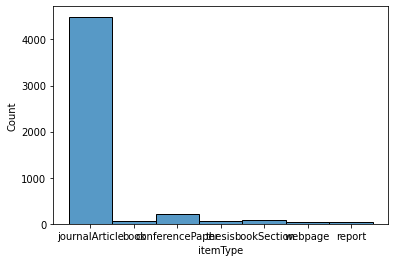

In [213]:
sns.histplot(zjson_df["itemType"])

In [101]:
zjson_df['itemType'].value_counts()

journalArticle     3759
conferencePaper     184
bookSection          68
thesis               59
book                 48
webpage              30
report               30
Name: itemType, dtype: int64

<AxesSubplot:xlabel='DOI_null', ylabel='Count'>

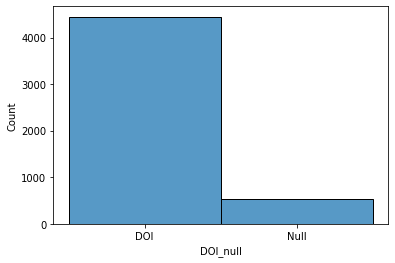

In [215]:
sns.histplot(zjson_df["DOI_null"])

In [216]:
zjson_df['DOI_null'].value_counts()

DOI     4445
Null     544
Name: DOI_null, dtype: int64

In [217]:
pd.crosstab(zjson_df.itemType, zjson_df.DOI_null)

DOI_null,DOI,Null
itemType,,
book,3,48
bookSection,79,0
conferencePaper,211,5
journalArticle,4128,366
report,6,35
thesis,11,60
webpage,7,30


In [218]:
pd.crosstab(zjson_df.itemType, zjson_df.DOI_null,normalize='index')

DOI_null,DOI,Null
itemType,,
book,0.058824,0.941176
bookSection,1.000000,0.000000
conferencePaper,0.976852,0.023148
journalArticle,0.918558,0.081442
report,0.146341,0.853659
thesis,0.154930,0.845070
webpage,0.189189,0.810811


In [102]:
1 - zjson_df.isna().sum() / len(zjson_df)

key                    0.778461
version                0.778461
itemType               0.778461
creators               0.775293
tags                   0.775293
DOI                    0.691820
url                    0.729458
volume                 0.680455
pages                  0.692938
title                  0.778461
publicationTitle       0.650456
abstractNote           0.649898
date                   0.774362
ISSN                   0.637600
language               0.637786
journalAbbreviation    0.331284
libraryCatalog         0.770076
accessDate             0.726663
bib                    0.778461
index                  0.778461
tURL                   1.000000
fail                   1.000000
perf                   1.000000
year                   0.774362
author                 0.775293
rights                 0.116452
issue                  0.509968
shortTitle             0.169741
numPages               0.008012
extra                  0.072666
ISBN                   0.024036
publishe

In [190]:
type1 = zjson_df[zjson_df['itemType'] == 'webpage'][['itemType', 'url']]
type2 = zjson_df[zjson_df['itemType'] == 'note'][['itemType', 'url']]
type3 = zjson_df[zjson_df['itemType'] == 'report'][['itemType', 'url']]
type4 = zjson_df[zjson_df['itemType'] == 'thesis'][['itemType', 'url']]
type5 = zjson_df[zjson_df['itemType'] == 'book'][['itemType', 'url']]
typetab = pd.concat([type1, type2, type3, type4, type5], sort=False)
typetab.to_csv('type_tables.csv')

In [200]:
for index, row in zjson_df.iterrows():
    if (type(row["extra"]) == str) and row["extra"][0:3] == 'DOI':
        print(row["index"])
        row["DOI"] = row["extra"][5:]      

83
84
124
252
253
326
338
344


In [226]:
for i in failed:
    print(links_to_process[i])

https://www.koreascience.or.kr/article/JAKO201514861263804.page
https://search.proquest.com/openview/a719d0ff4565c6533e48f44c618b721d/1?pq-origsite=gscholar&cbl=18750
https://search.proquest.com/openview/d6aa7c858827c98f64a2deae641325b5/1?pq-origsite=gscholar&cbl=18750
https://search.proquest.com/openview/901f1d92aceb7751be73fdb5c63de7a4/1?pq-origsite=gscholar&cbl=18750
https://search.proquest.com/openview/832ba73d31b6bf3a7ad179bd4640d12e/1?pq-origsite=gscholar&cbl=105742
http://ch.whu.edu.cn/en/article/doi/10.13203/j.whugis20180273?viewType=SUP
https://search.proquest.com/openview/9c55083a6244a504bd1c9f92e50bf829/1?pq-origsite=gscholar&cbl=18750&diss=y
https://search.proquest.com/openview/a1d85f2ee63aa3e3134d1e556d24ecff/1?pq-origsite=gscholar&cbl=18750
https://arxiv.org/abs/2110.10849
https://mausamjournal.imd.gov.in/index.php/MAUSAM/article/view/145
https://search.proquest.com/openview/d3accaf31876df4d1d5cea83a09cc97d/1?pq-origsite=gscholar&cbl=18750
https://search.proquest.com/open

In [227]:
for i in perffail:
    print(links_to_process[i])

https://iopscience.iop.org/article/10.1088/1755-1315/149/1/012009/meta
https://iopscience.iop.org/article/10.1088/1742-6596/1524/1/012005/meta
https://iopscience.iop.org/article/10.1088/1748-9326/abc6d1/meta
https://iopscience.iop.org/article/10.1088/1748-9326/aadbb9/meta
https://iopscience.iop.org/article/10.1088/1748-9326/ab93fc/meta
https://iopscience.iop.org/article/10.1088/1748-9326/2/4/045009/meta
https://iopscience.iop.org/article/10.1088/1748-9326/11/9/095005/meta
https://iopscience.iop.org/article/10.1088/1748-9326/9/8/084005/meta
https://iopscience.iop.org/article/10.1088/1757-899X/640/1/012087/meta
https://iopscience.iop.org/article/10.1088/1742-6596/749/1/012004/meta
https://iopscience.iop.org/article/10.3847/1538-4357/aa8b74/meta
https://iopscience.iop.org/article/10.1088/1748-9326/aaf935/meta
https://iopscience.iop.org/article/10.1088/1755-1315/279/1/012050/meta
https://iopscience.iop.org/article/10.1088/2515-7620/ab2bc2/meta
https://iopscience.iop.org/article/10.1088/175

In [229]:
len(perffail)

72

In [232]:
zjson_df['extra'].unique()

array([nan, 'Google-Books-ID: QdCPDwAAQBAJ', 'ISSN: 2153-7003',
       'ISSN: 1558-2809', 'ISSN: 2165-431X',
       'Google-Books-ID: B7wkBQAAQBAJ',
       'DOI: 10.6092/unibo/amsdottorato/8012',
       'DOI: 10.1002/9781119720553.ch4',
       'DOI: 10.1007/978-3-319-67047-8_4',
       'Google-Books-ID: zEKBDQAAQBAJ', 'DOI: 10.15781/T2X05XJ15',
       'ADS Bibcode: 2017EGUGA..19.8371S',
       'ADS Bibcode: 2021EGUGA..23.8521T',
       'ADS Bibcode: 2018AGUFM.A33J3292A',
       'DOI: 10.1016/B978-0-12-812782-7.00015-1',
       'DOI: 10.1007/698_2020_481', 'DOI: 10.1002/9781119427339.ch1',
       'ADS Bibcode: 2018AGUFM.A31I2962A',
       'PMID: null\nPMCID: PMC7300216', 'DOI: 10.1002/9781119478911.ch11',
       'DOI: 10.15781/T27940V02', 'DOI: 10.15781/T2086358F',
       'DOI: 10.1007/978-3-030-60869-9_19',
       'DOI: 10.1007/978-3-030-64202-0_22',
       'DOI: 10.1142/9789814472616_0003',
       'ADS Bibcode: 2016AMT.....9.6035P',
       'ADS Bibcode: 2012AGUFM.A33H0238F',
       'A

In [112]:
#zjson_df.to_json("zot.csv")